In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns

# **Distribution analysis of the parameters for the cost structure**

In [2]:
# Import Bulk_PA from parquet
Bulk_PA = pd.read_parquet('Bulk_PA_final.parquet')

# Show all the columns
pd.set_option('display.max_columns', None)

Bulk_PA

,load_zone,load_country,load_port,load_draft,load_start_date,load_end_date,discharge_zone,discharge_country,discharge_port,discharge_draft,discharge_start_date,discharge_end_date,commodity,commodity_group,imo,vsl_dwt,vsl_name,vsl_type,vsl_max_speed,vsl_max_draft,has_part_voy,voy_draft_diff,voy_load_draft_ratio,voy_intake_mt,voy_avg_speed,voy_speed_ratio,voy_top_speed,voy_duration_h,voy_sea_duration_h,voy_ais_destination,blackout_duration_h,me_con_g,ae_con_g,ab_con_g,distance,fuel_consumption_mt,proxy_distance,distance_difference,distance_94,load_NE_America,load_NW_America,load_SE_America,load_SW_America,load_E_Asia,load_Europe_N_Africa,load_Australia,disch_NE_America,disch_NW_America,disch_SE_America,disch_SW_America,disch_E_Asia,disch_Europe_N_Africa,disch_Australia,OD_region,region_pairs,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,rerouting (%),route,proxy_transit_month,ONI,ONI_lag_1,ONI_lag_2,ONI_lag_3,water_level_m,water_level_m_lag_1,water_level_m_lag_2,water_level_m_lag_3,IFO380,Coal_Australian,Soybeans,Maize_Corn,Wheat_HRW,Phosphate_rock,Copper,Soybean_meal,Sugar,Urea,Potassium_chloride,Zinc,Wood_Pellets,Coking_Coal,HRC_Steel,Steel,Petroleum_Coke,Salt,cargo_value,vsl_LOA,vsl_beam,vsl_ship_size,canal_fee
0,West Coast South America,Peru,Bayovar,12.04,2019-01-03 15:58:12,2019-01-03,USG,USA,Manatee,6.1,2019-01-15,2019-01-21 09:18:49,Phosphate Rock,Fertilizers,9240811,52514,MARIA F,Bulk Carrier,14.5,12.040,0,5.94,100.0000,48967,12.55,86.55,13.49,425.350000,266.933333,Manatee,171.916667,NaN,NaN,NaN,NaN,NaN,3350.013333,NaN,3350.013333,0,0,0,1,0,0,0,1,0,0,0,0,0,0,SW_America_to_NE_America,NE_America-SW_America,2940.0,9.425,10267.5,32.910,7327.5,23.485,249.234694,Cape Horn,2019-01,0.75,0.81,0.90,0.76,26.188514,26.786906,26.810513,26.664789,406.000000,98.56,381.960000,166.743164,209.806356,102.5,5939.10,362.010000,563.721334,260.0,215.5,2569.70,273.90,185.15,694.0,534.94,90.0,25.0,5.019118e+06,197.155331,31.179879,Super,195041.10
1,West Coast South America,Chile,Puerto Patache,11.80,2019-01-01 17:56:12,2019-01-03,East Coast U.S,USA,New York,6.5,2019-01-21,2019-01-24 00:48:47,Salt,Bulk,9490832,57970,Genco Rhone,Bulk Carrier,14.3,12.950,0,5.30,91.1197,48266,11.16,78.04,13.23,534.883333,390.366667,New York,0.000000,3.771151e+08,2.038345e+07,3.040235e+06,42224.579360,400.538755,4356.492000,37868.087360,4356.492000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,SW_America_to_NE_America,NE_America-SW_America,2940.0,9.425,10267.5,32.910,7327.5,23.485,249.234694,Cape Horn,2019-01,0.75,0.81,0.90,0.76,26.188514,26.786906,26.810513,26.664789,406.000000,98.56,381.960000,166.743164,209.806356,102.5,5939.10,362.010000,563.721334,260.0,215.5,2569.70,273.90,185.15,694.0,534.94,90.0,25.0,1.206650e+06,203.249933,32.300000,Super,201315.50
2,North West Africa,Morocco,Casablanca,12.20,2019-01-01 06:07:01,2019-01-03,West Coast Central America,Mexico,Lazaro Cardenas,6.9,2019-01-29,2019-02-02 03:19:16,Phosphate Rock,Fertilizers,9801249,63602,BELNIPPON,Bulk Carrier,14.5,13.418,0,5.30,88.6868,50863,13.13,90.55,15.50,765.200000,575.000000,Lazaro Cardenas,0.000000,5.530144e+08,4.796344e+07,1.508180e+07,111108.555800,616.059661,7549.750000,103558.805800,7549.750000,0,0,0,0,0,1,0,0,1,0,0,0,0,0,Europe_N_Africa_to_NW_America,Europe_N_Africa-NW_America,8064.5,25.845,13603.5,43.600,5539.0,17.755,68.683737,Cape Horn,2019-01,0.75,0.81,0.90,0.76,26.188514,26.786906,26.810513,26.664789,406.000000,98.56,381.960000,166.743164,209.806356,102.5,5939.10,362.010000,563.721334,260.0,215.5,2569.70,273.90,185.15,694.0,534.94,90.0,25.0,5.213458e+06,209.137924,32.300000,Neopanamax,377621.00
3,West Mediterranean,Spain,Barcelona,10.90,2019-01-01 19:39:22,2019-01-04,West Coast Central America,Costa Rica,Caldera (Costa Rica),6.3,2019-01-31,2019-02-02 10:46:45,Clinker,Breakbulk,9692727,55757,AQUAVITA BAY,Bulk Carrier,14.5,12.735,0,4.60,85.5909,42697,11.67,80.48,14.02,759.116667,595.300000,Caldera (Costa Rica),0.000000,4.

In [3]:
# List all the unique region_pair
Bulk_PA['region_pairs'].unique()

array(['NE_America-SW_America', 'Europe_N_Africa-NW_America',
       'E_Asia-NE_America', 'NW_America-SE_America', 'E_Asia-SE_America',
       'Europe_N_Africa-SW_America', 'Australia-NE_America',
       'NE_America-NW_America', 'SE_America-SW_America'], dtype=object)

## **DWT distribution**

As we can see, the distribution of vsl_dwt is asymmetric towards the maximum. Therefore, we use the median to aggregate the data

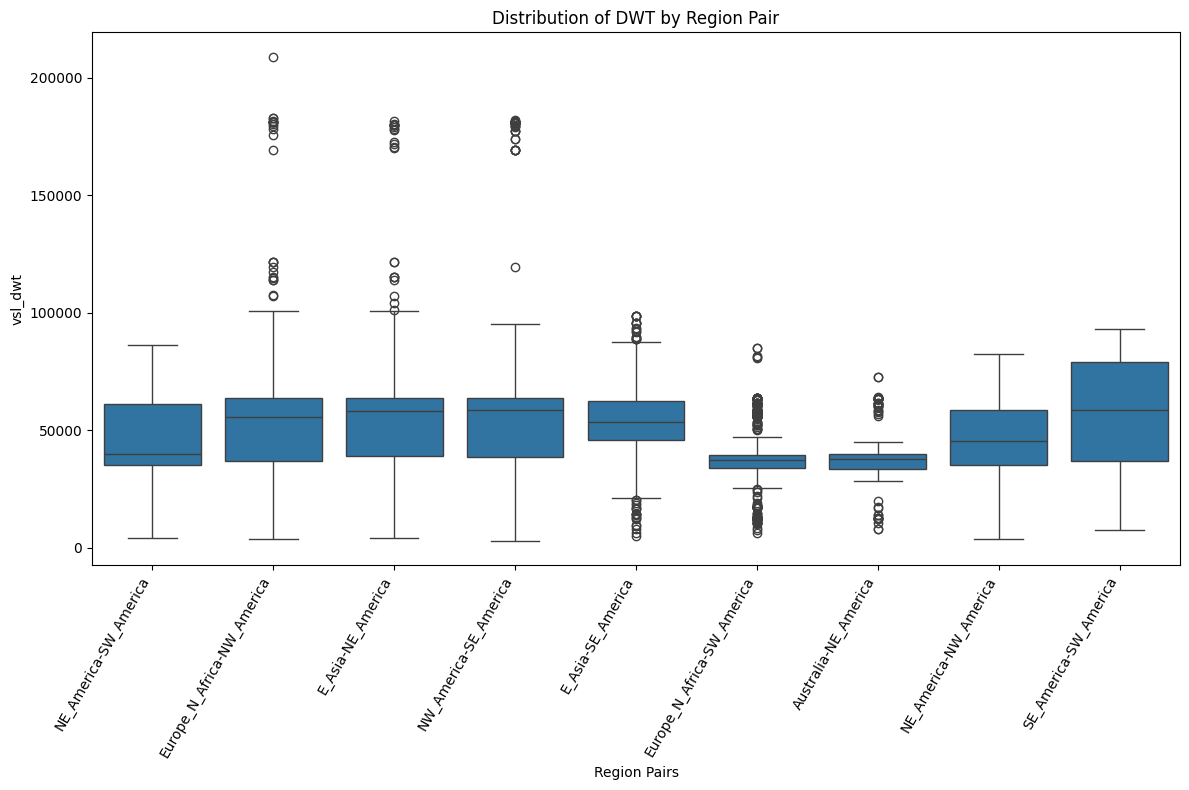

In [4]:
# Vessel's dwt distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='vsl_dwt', data=Bulk_PA[Bulk_PA['proxy_transit_month']<'2023-06'])
plt.title('Distribution of DWT by Region Pair')
plt.xlabel('Region Pairs')
plt.ylabel('vsl_dwt')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

## **Fuel consumption distribution**

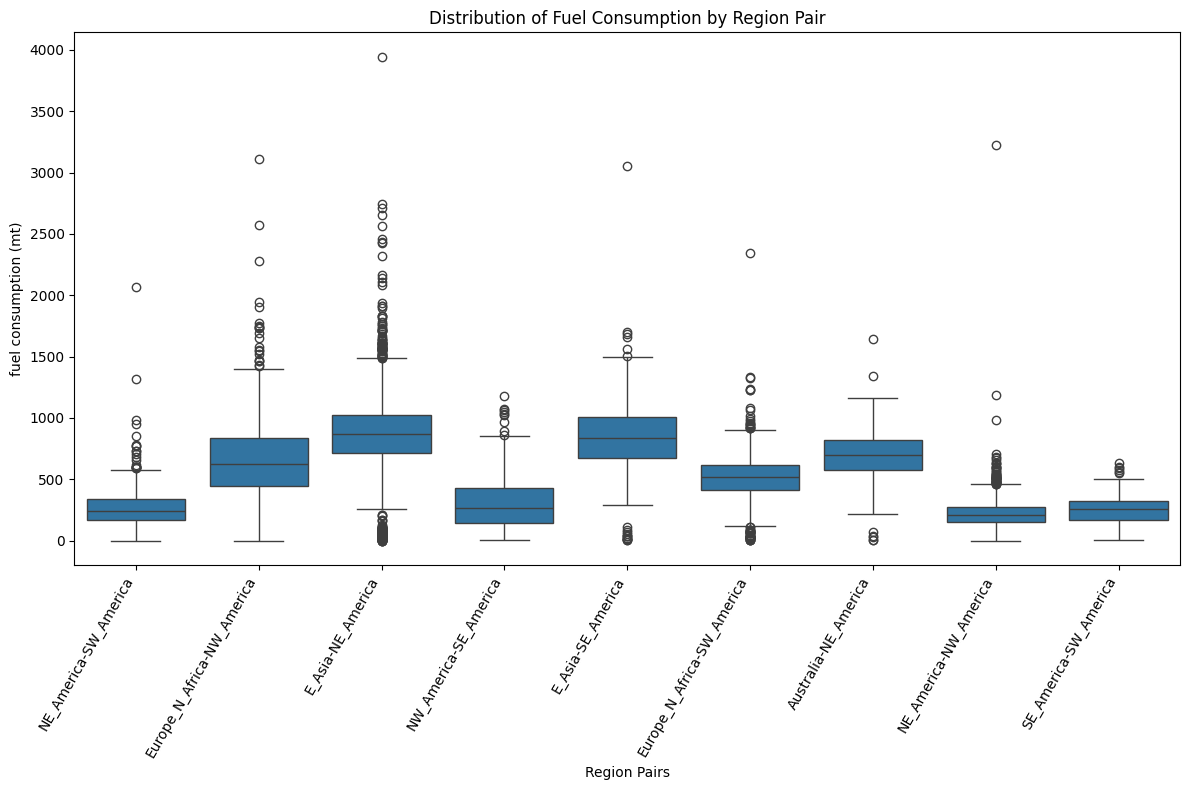

In [5]:
# Vessel's fuel consumption distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='fuel_consumption_mt', data=Bulk_PA[Bulk_PA['proxy_transit_month']<'2023-06'])
plt.title('Distribution of Fuel Consumption by Region Pair')
plt.xlabel('Region Pairs')
plt.ylabel('fuel consumption (mt)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

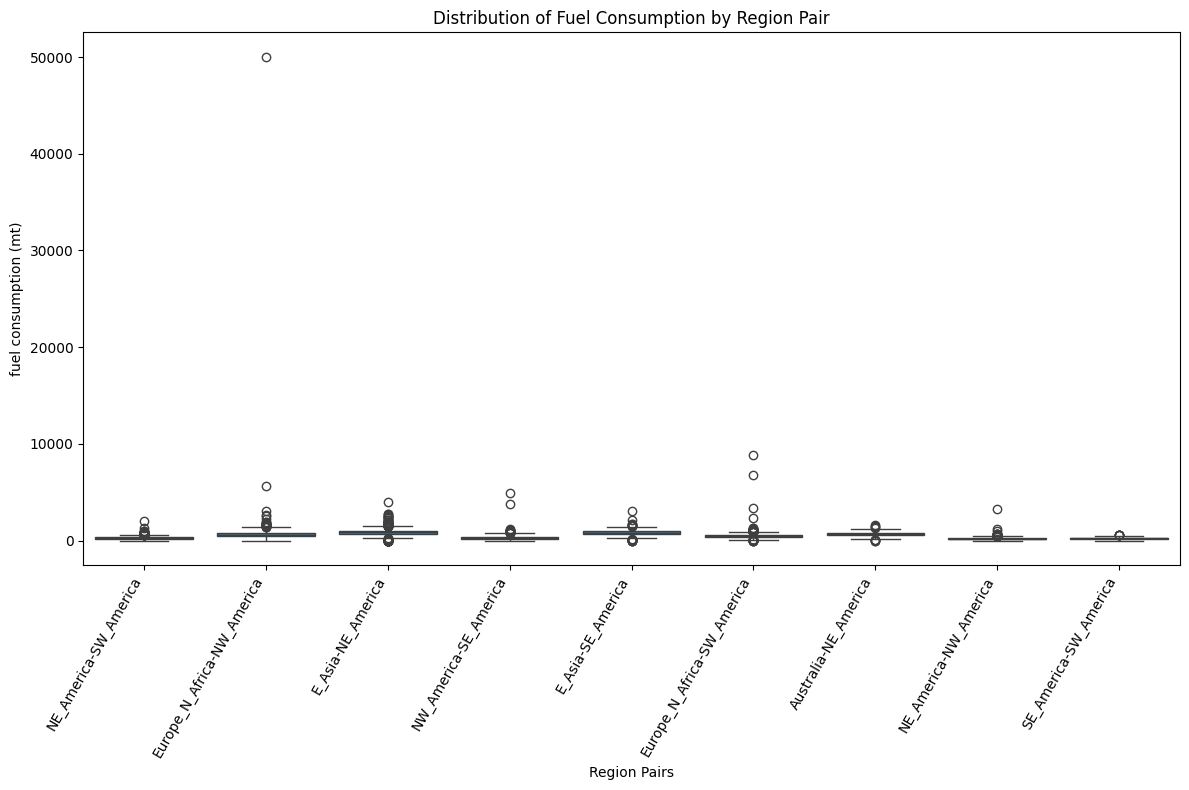

In [6]:
# Vessel's fuel consumption distribution
'''for all the time period'''
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='fuel_consumption_mt', data=Bulk_PA[Bulk_PA['proxy_transit_month']<'2025-01'])
plt.title('Distribution of Fuel Consumption by Region Pair')
plt.xlabel('Region Pairs')
plt.ylabel('fuel consumption (mt)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [7]:
Bulk_PA['fuel_consumption_mt'].describe()

,fuel_consumption_mt
count,10351.000000
mean,561.850182
std,624.771833
min,0.000000
25%,235.872582
50%,509.761051
75%,826.077342
max,50048.022052


In [8]:
def replace_outliers_with_median_by_region(df, column_name, region_column, multiplier=1.5):
    """Replaces outliers with the median of the corresponding region pair.

    Args:
        df: The DataFrame to modify.
        column_name: The name of the column containing the data to check for outliers.
        region_column: The name of the column containing the region information.
        multiplier: The IQR multiplier to define outliers (default: 1.5).

    Returns:
        The modified DataFrame with outliers replaced with region median values.
    """

    # Create a copy of the original column to compare against
    original_values = df[column_name].copy()

    # Calculate the median for each region pair
    region_pair_medians = df.groupby(region_column)[[column_name]].median()

    for region in df[region_column].unique():
        region_data = df[df[region_column] == region][column_name]
        Q1 = region_data.quantile(0.25)
        Q3 = region_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Replace outliers for the current region with the median for that region
        df.loc[
            (df[region_column] == region)
            & ((df[column_name] < lower_bound) | (df[column_name] > upper_bound)),
            column_name,
        ] = region_pair_medians.loc[region, column_name]  # Use pre-calculated medians

    # Count the number of changed values
    changed_count = (df[column_name] != original_values).sum()

    return df, changed_count

# Apply the function and get the changed count
Bulk_PA, changed_count = replace_outliers_with_median_by_region(Bulk_PA, 'fuel_consumption_mt', 'region_pairs')

# Print the changed count
print(f"Number of values changed: {changed_count}")

Number of values changed: 1191


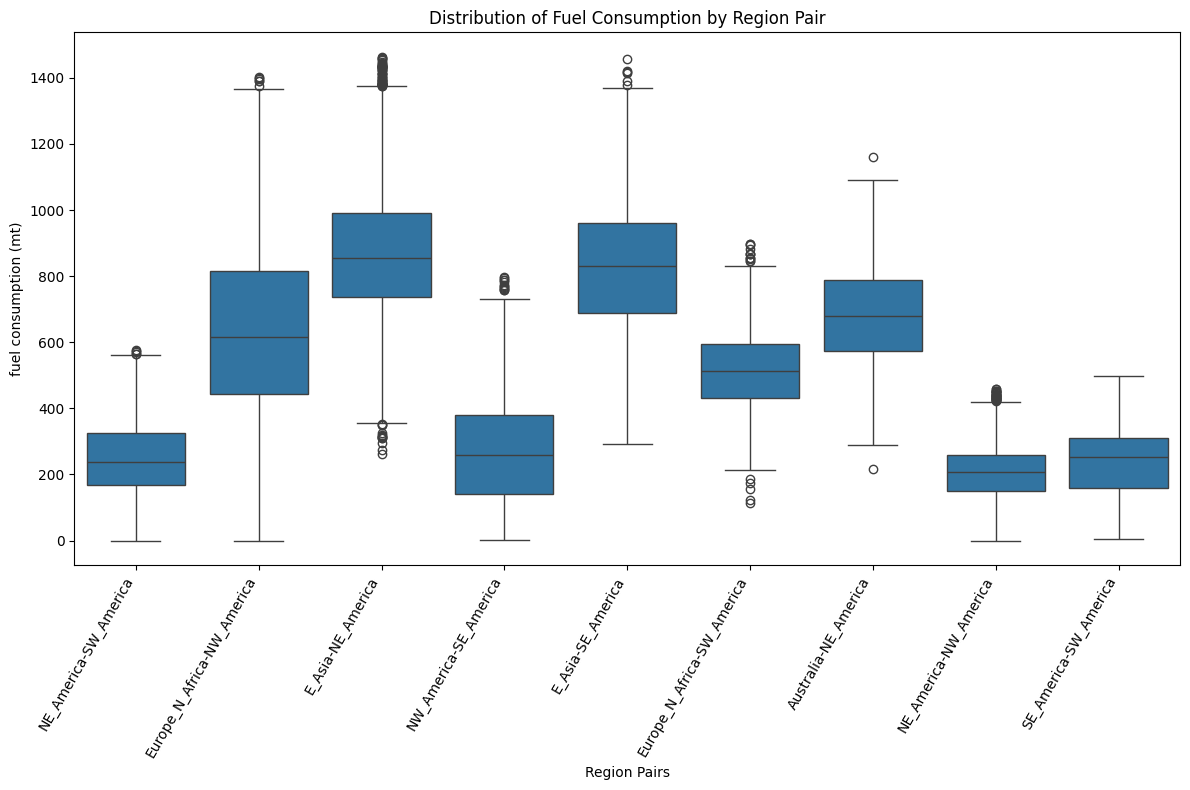

In [9]:
# Vessel's fuel consumption distribution
'''for all the time period'''
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='fuel_consumption_mt', data=Bulk_PA[Bulk_PA['proxy_transit_month']<'2025-01'])
plt.title('Distribution of Fuel Consumption by Region Pair')
plt.xlabel('Region Pairs')
plt.ylabel('fuel consumption (mt)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

# **Cost analysis for rerouted vessels during El-Nino**: 2023-06 to 2023-10

In [10]:
# Read Bulk_rerouted from parquet
Bulk_rerouted = pd.read_parquet('Bulk_rerouted.parquet')
Bulk_PA_Before_ElNino = pd.read_parquet('Bulk_PA_before_ElNino.parquet')
Bulk_rerouted

,proxy_transit_month,region_pairs,voy_intake_sum,number_transits,ONI,ONI_lag_1,ONI_lag_2,ONI_lag_3,water_level_m,water_level_m_lag_1,water_level_m_lag_2,water_level_m_lag_3,IFO380,Coal_Australian,Soybeans,Maize_Corn,Wheat_HRW,Phosphate_rock,Copper,Soybean_meal,Sugar,Urea,Potassium_chloride,Zinc,Wood_Pellets,Coking_Coal,HRC_Steel,Steel,Petroleum_Coke,Salt,voy_sea_duration_h,distance_94,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,vsl_dwt,fuel_consumption_mt,cargo_value,canal_fee,Australia-NE_America,E_Asia-NE_America,E_Asia-SE_America,Europe_N_Africa-NW_America,Europe_N_Africa-SW_America,NE_America-NW_America,NE_America-SW_America,NW_America-SE_America,SE_America-SW_America,dry_season,rain_season_1st_half,rain_season_2nd_half,residuals,forecast,forecastElNino,rerouted_voy,forecast_rerouted_voy
467,2023-06-01,SE_America-SW_America,284786,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,451.725000,2850.443453,2021.0,6.475,8764.0,28.090,6743.0,21.615,37831.5,264.727411,9.720624e+06,178156.225,0,0,0,0,0,0,0,0,1,0,1,0,-1.555517,7.600000,9.555517,0.000000,-1.955517
468,2023-06-01,E_Asia-SE_America,37144,2,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,1382.900000,11778.460371,8463.0,27.130,14312.0,45.870,5849.0,18.740,20669.0,858.187637,1.860352e+07,117136.250,0,0,1,0,0,0,0,0,0,0,1,0,-7.590435,6.181818,9.590435,4.181818,-3.408617
469,2023-06-01,NW_America-SE_America,836387,17,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,388.724510,1860.826586,3661.5,11.735,12510.5,40.095,8849.0,28.360,63301.0,151.121499,9.519040e+06,207446.150,0,0,0,0,0,0,0,1,0,0,1,0,-0.512110,9.636364,17.512110,0.000000,-7.875746
470,2023-06-01,NE_America-SW_America,777123,22,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,453.330303,3454.833727,2940.0,9.425,10267.5,32.910,7327.5,23.485,37963.0,180.004157,1.713560e+07,178307.450,0,0,0,0,0,0,1,0,0,0,1,0,-2.012110,33.288889,24.012110,11.288889,9.276779
471,2023-06-01,Europe_N_Africa-SW_America,218320,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,827.022917,5485.504805,8023.0,25.710,11007.0,35.280,2984.0,9.570,35869.5,469.088036,1.860352e+07,157649.275,0,0,0,0,1,0,0,0,0,0,1,0,-5.200698,12.318182,13.200698,4.318182,-0.882517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2024-08-01,Europe_N_Africa-SW_America,335362,11,-0.11,0.04,0.15,0.39,26.031493,25.561315,25.030379,24.602571,510.795455,145.76,400.13,170.324757,250.85,152.5,8971.96,436.03,785.506106,342.5,294.0,2714.08,315.48,178.08,795.0,439.18,100.0,25.0,744.840909,6992.845595,8023.0,25.710,11007.0,35.280,2984.0,9.570,35920.0,492.067147,1.860352e+07,175958.000,0,0,0,0,1,0,0,0,0,0,1,0,NaN,12.318182,10.007327,1.318182,2.310855
583,2024-08-01,NE_America-NW_America,685916,19,-0.11,0.04,0.15,0.39,26.031493,25.561315,25.030379,24.602571,510.795455,145.76,400.13,170.324757,250.85,152.5,8971.96,436.03,785.506106,342.5,294.0,2714.08,315.48,178.08,795.0,439.18,100.0,25.0,324.332456,2113.142248,3117.0,9.995,12518.5,40.120,9401.5,30.125,40050.0,151.528153,8.994339e+06,180707

## **Daily capital cost**

In [11]:
# Convert 'voy_sea_duration_h' to days
Bulk_rerouted['voy_sea_duration_day'] = Bulk_rerouted['voy_sea_duration_h'] / 24
Bulk_PA_Before_ElNino['voy_sea_duration_day'] = Bulk_PA_Before_ElNino['voy_sea_duration_h'] / 24

# Create a column capital_cost
# Initialize the new column
Bulk_rerouted['capital_cost'] = np.nan
# Same for Bulk_PA_Before_ElNino
Bulk_PA_Before_ElNino['capital_cost'] = np.nan

# Calculate the capitl cost
Bulk_rerouted['capital_cost'] =  20.971*(372.53+7.94E-03*Bulk_rerouted['vsl_dwt']**(1.2))**0.6988
Bulk_PA_Before_ElNino['capital_cost'] =  20.971*(372.53+7.94E-03*Bulk_PA_Before_ElNino['vsl_dwt']**(1.2))**0.6988
Bulk_rerouted

,proxy_transit_month,region_pairs,voy_intake_sum,number_transits,ONI,ONI_lag_1,ONI_lag_2,ONI_lag_3,water_level_m,water_level_m_lag_1,water_level_m_lag_2,water_level_m_lag_3,IFO380,Coal_Australian,Soybeans,Maize_Corn,Wheat_HRW,Phosphate_rock,Copper,Soybean_meal,Sugar,Urea,Potassium_chloride,Zinc,Wood_Pellets,Coking_Coal,HRC_Steel,Steel,Petroleum_Coke,Salt,voy_sea_duration_h,distance_94,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,vsl_dwt,fuel_consumption_mt,cargo_value,canal_fee,Australia-NE_America,E_Asia-NE_America,E_Asia-SE_America,Europe_N_Africa-NW_America,Europe_N_Africa-SW_America,NE_America-NW_America,NE_America-SW_America,NW_America-SE_America,SE_America-SW_America,dry_season,rain_season_1st_half,rain_season_2nd_half,residuals,forecast,forecastElNino,rerouted_voy,forecast_rerouted_voy,voy_sea_duration_day,capital_cost
467,2023-06-01,SE_America-SW_America,284786,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,451.725000,2850.443453,2021.0,6.475,8764.0,28.090,6743.0,21.615,37831.5,264.727411,9.720624e+06,178156.225,0,0,0,0,0,0,0,0,1,0,1,0,-1.555517,7.600000,9.555517,0.000000,-1.955517,18.821875,5437.520526
468,2023-06-01,E_Asia-SE_America,37144,2,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,1382.900000,11778.460371,8463.0,27.130,14312.0,45.870,5849.0,18.740,20669.0,858.187637,1.860352e+07,117136.250,0,0,1,0,0,0,0,0,0,0,1,0,-7.590435,6.181818,9.590435,4.181818,-3.408617,57.620833,3588.239496
469,2023-06-01,NW_America-SE_America,836387,17,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,388.724510,1860.826586,3661.5,11.735,12510.5,40.095,8849.0,28.360,63301.0,151.121499,9.519040e+06,207446.150,0,0,0,0,0,0,0,1,0,0,1,0,-0.512110,9.636364,17.512110,0.000000,-7.875746,16.196855,8016.465446
470,2023-06-01,NE_America-SW_America,777123,22,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,453.330303,3454.833727,2940.0,9.425,10267.5,32.910,7327.5,23.485,37963.0,180.004157,1.713560e+07,178307.450,0,0,0,0,0,0,1,0,0,0,1,0,-2.012110,33.288889,24.012110,11.288889,9.276779,18.888763,5451.292139
471,2023-06-01,Europe_N_Africa-SW_America,218320,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,827.022917,5485.504805,8023.0,25.710,11007.0,35.280,2984.0,9.570,35869.5,469.088036,1.860352e+07,157649.275,0,0,0,0,1,0,0,0,0,0,1,0,-5.200698,12.318182,13.200698,4.318182,-0.882517,34.459288,5231.389813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2024-08-01,Europe_N_Africa-SW_America,335362,11,-0.11,0.04,0.15,0.39,26.031493,25.561315,25.030379,24.602571,510.795455,145.76,400.13,170.324757,250.85,152.5,8971.96,436.03,785.506106,342.5,294.0,2714.08,315.48,178.08,795.0,439.18,100.0,25.0,744.840909,6992.845595,8023.0,25.710,11007.0,35.280,2984.0,9.570,35920.0,492.067147,1.860352e+07,175958.000,0,0,0,0,1,0,0,0,0,0,1,0,NaN,12.318182,10.007327,1.318182,2.310855,31.035038,5236.711031
583,2024-08-01,NE_America-NW_America,685916,19,-0.11,0.04,0.15,0.39,26.031493,25.561315,25.030379,24.602571,510.795455,145.76,400.13,170.324757,250.85,152.5,8971.96,436.0

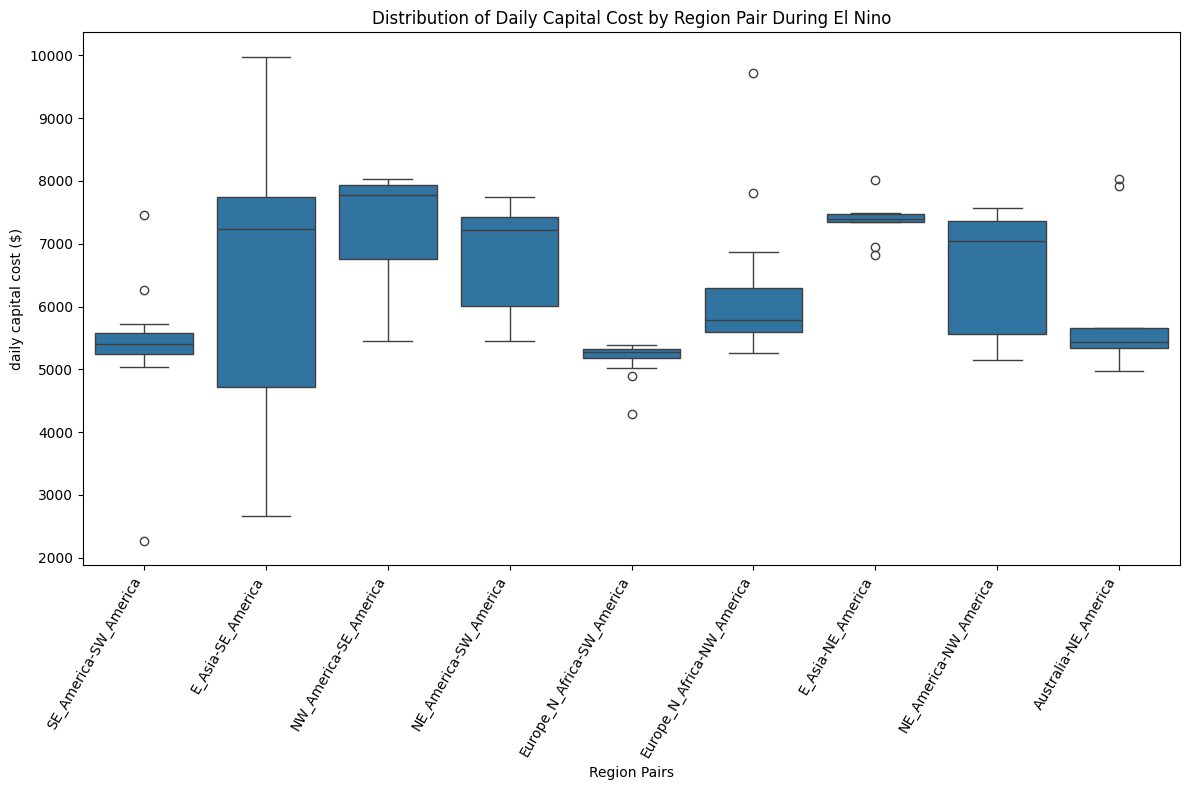

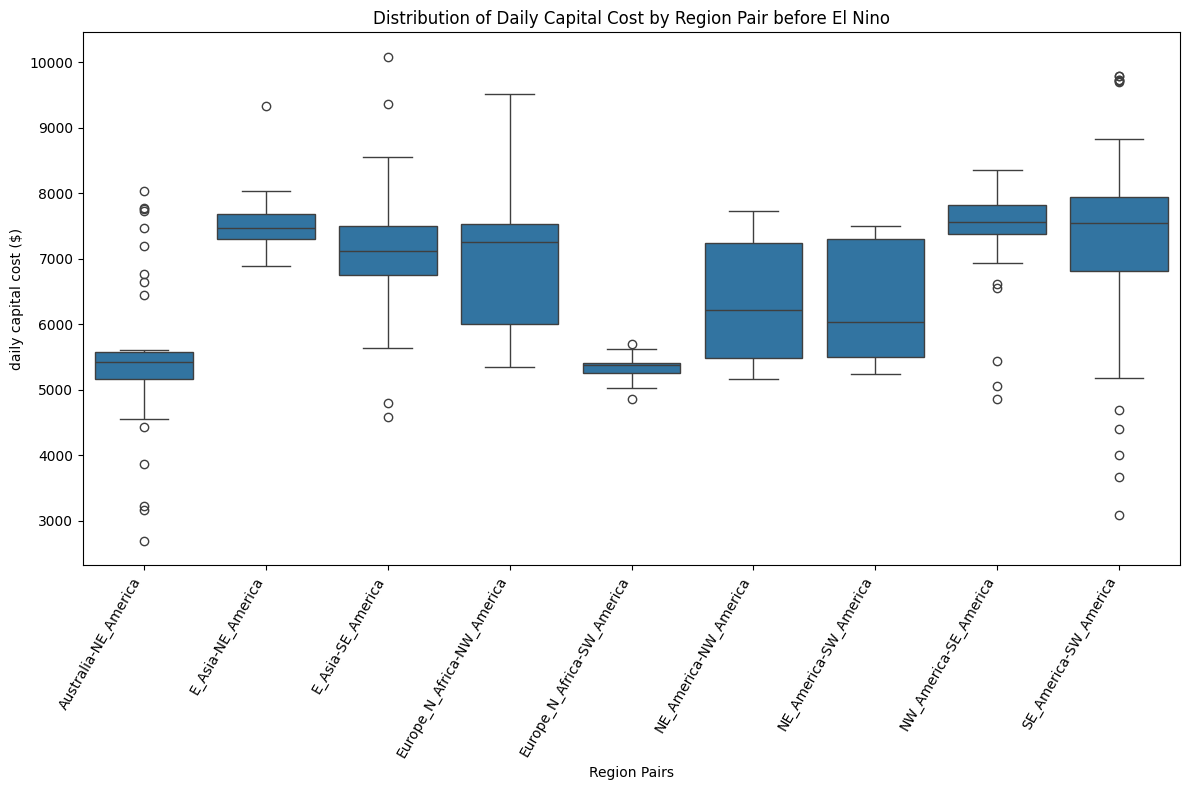

In [12]:
# Capital cost distribution for Bulk_rerouted
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='capital_cost', data=Bulk_rerouted)
plt.title('Distribution of Daily Capital Cost by Region Pair During El Nino')
plt.xlabel('Region Pairs')
plt.ylabel('daily capital cost ($)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

# Capital cost distribution for Bulk_PA_Before_ElNino
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='capital_cost', data=Bulk_PA_Before_ElNino)
plt.title('Distribution of Daily Capital Cost by Region Pair before El Nino')
plt.xlabel('Region Pairs')
plt.ylabel('daily capital cost ($)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

TEU to DWT convertion formula: TEU = 372.53+7.94E-03*DWT^(1.2)
Source: Abramowski et al. (2021)

## **Daily operating cost**

In [13]:
# Create a column operating_cost
# Initialize the new column
Bulk_rerouted['operating_cost'] = np.nan
Bulk_PA_Before_ElNino['operating_cost'] = np.nan

# Calculate the operating cost
Bulk_rerouted['operating_cost'] =  952.9*(372.53+7.94E-03*Bulk_rerouted['vsl_dwt']**(1.2))**0.2162
Bulk_PA_Before_ElNino['operating_cost'] =  952.9*(372.53+7.94E-03*Bulk_PA_Before_ElNino['vsl_dwt']**(1.2))**0.2162
Bulk_rerouted

,proxy_transit_month,region_pairs,voy_intake_sum,number_transits,ONI,ONI_lag_1,ONI_lag_2,ONI_lag_3,water_level_m,water_level_m_lag_1,water_level_m_lag_2,water_level_m_lag_3,IFO380,Coal_Australian,Soybeans,Maize_Corn,Wheat_HRW,Phosphate_rock,Copper,Soybean_meal,Sugar,Urea,Potassium_chloride,Zinc,Wood_Pellets,Coking_Coal,HRC_Steel,Steel,Petroleum_Coke,Salt,voy_sea_duration_h,distance_94,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,vsl_dwt,fuel_consumption_mt,cargo_value,canal_fee,Australia-NE_America,E_Asia-NE_America,E_Asia-SE_America,Europe_N_Africa-NW_America,Europe_N_Africa-SW_America,NE_America-NW_America,NE_America-SW_America,NW_America-SE_America,SE_America-SW_America,dry_season,rain_season_1st_half,rain_season_2nd_half,residuals,forecast,forecastElNino,rerouted_voy,forecast_rerouted_voy,voy_sea_duration_day,capital_cost,operating_cost
467,2023-06-01,SE_America-SW_America,284786,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,451.725000,2850.443453,2021.0,6.475,8764.0,28.090,6743.0,21.615,37831.5,264.727411,9.720624e+06,178156.225,0,0,0,0,0,0,0,0,1,0,1,0,-1.555517,7.600000,9.555517,0.000000,-1.955517,18.821875,5437.520526,5319.138343
468,2023-06-01,E_Asia-SE_America,37144,2,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,1382.900000,11778.460371,8463.0,27.130,14312.0,45.870,5849.0,18.740,20669.0,858.187637,1.860352e+07,117136.250,0,0,1,0,0,0,0,0,0,0,1,0,-7.590435,6.181818,9.590435,4.181818,-3.408617,57.620833,3588.239496,4677.252428
469,2023-06-01,NW_America-SE_America,836387,17,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,388.724510,1860.826586,3661.5,11.735,12510.5,40.095,8849.0,28.360,63301.0,151.121499,9.519040e+06,207446.150,0,0,0,0,0,0,0,1,0,0,1,0,-0.512110,9.636364,17.512110,0.000000,-7.875746,16.196855,8016.465446,5997.889464
470,2023-06-01,NE_America-SW_America,777123,22,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,453.330303,3454.833727,2940.0,9.425,10267.5,32.910,7327.5,23.485,37963.0,180.004157,1.713560e+07,178307.450,0,0,0,0,0,0,1,0,0,0,1,0,-2.012110,33.288889,24.012110,11.288889,9.276779,18.888763,5451.292139,5323.302706
471,2023-06-01,Europe_N_Africa-SW_America,218320,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,827.022917,5485.504805,8023.0,25.710,11007.0,35.280,2984.0,9.570,35869.5,469.088036,1.860352e+07,157649.275,0,0,0,0,1,0,0,0,0,0,1,0,-5.200698,12.318182,13.200698,4.318182,-0.882517,34.459288,5231.389813,5255.917979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2024-08-01,Europe_N_Africa-SW_America,335362,11,-0.11,0.04,0.15,0.39,26.031493,25.561315,25.030379,24.602571,510.795455,145.76,400.13,170.324757,250.85,152.5,8971.96,436.03,785.506106,342.5,294.0,2714.08,315.48,178.08,795.0,439.18,100.0,25.0,744.840909,6992.845595,8023.0,25.710,11007.0,35.280,2984.0,9.570,35920.0,492.067147,1.860352e+07,175958.000,0,0,0,0,1,0,0,0,0,0,1,0,NaN,12.318182,10.007327,1.318182,2.310855,31.035038,5236.711031,5257.571436
583,2024-08-01,NE_America-NW_America,685916,19,-0.11,0.04,0.15,0.39,26.031493,2

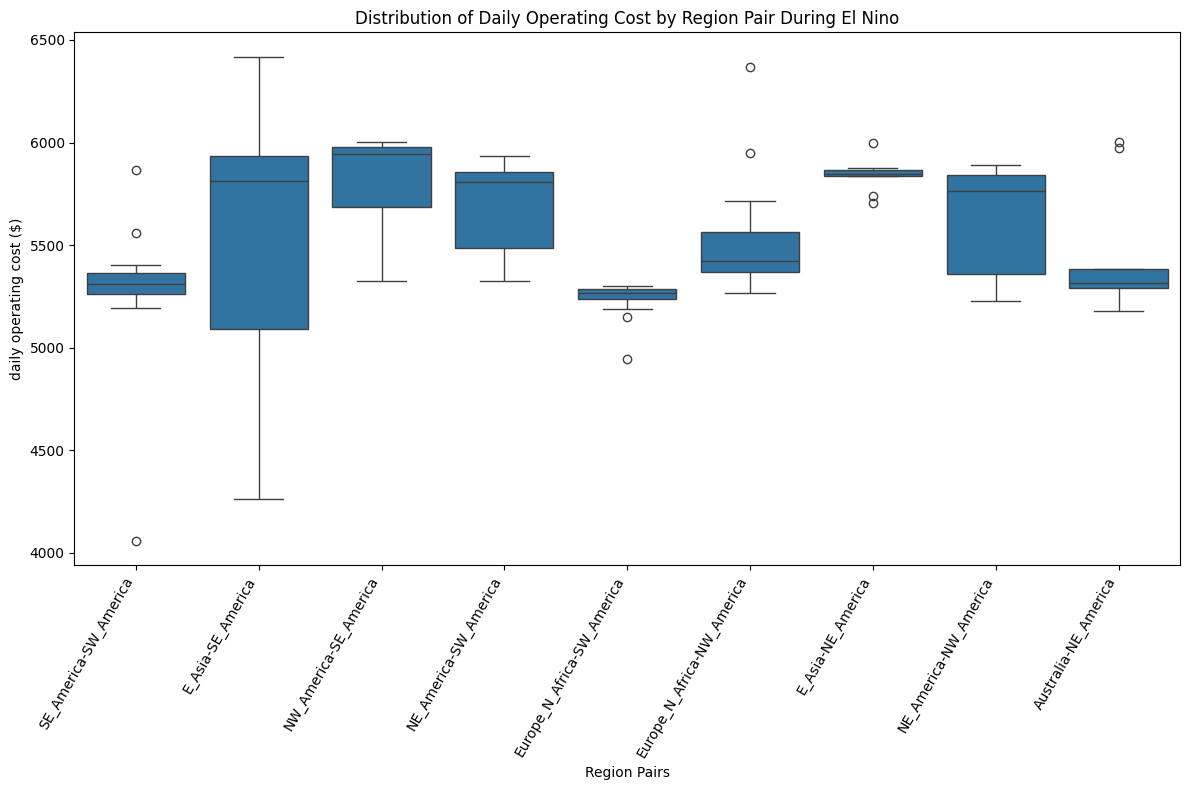

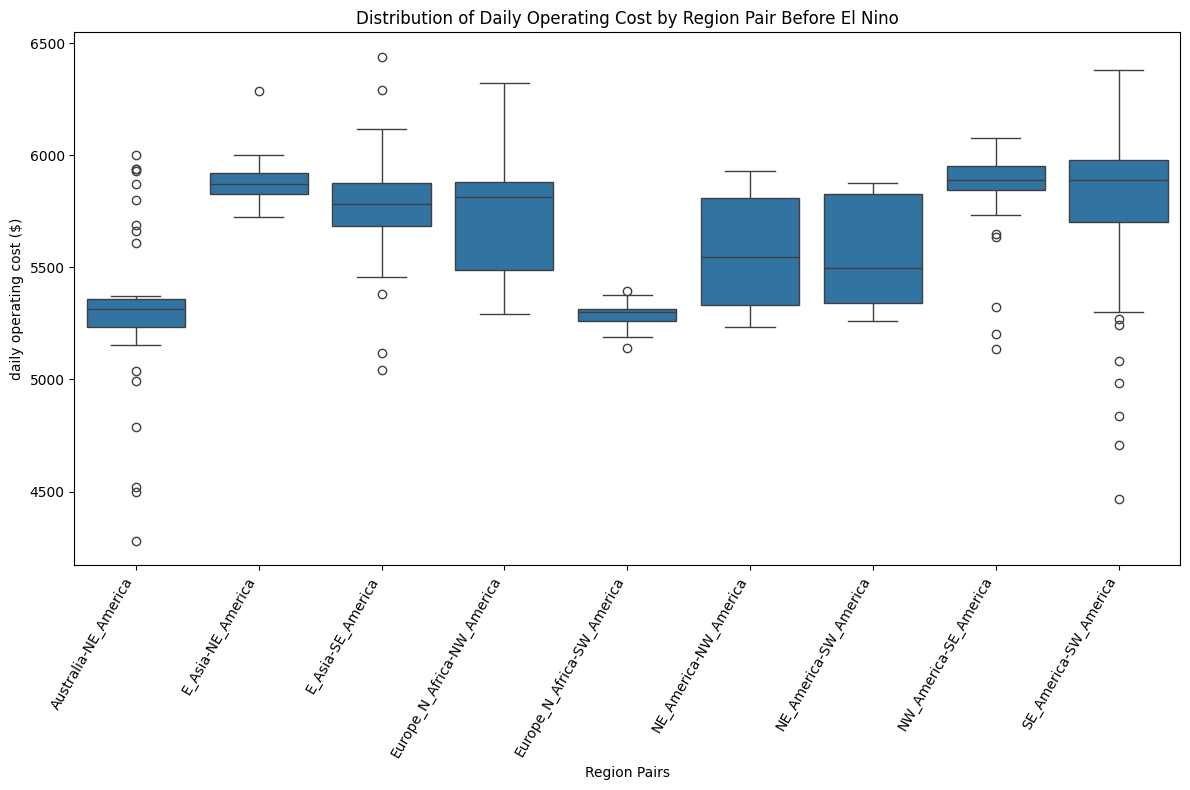

In [14]:
# Operating cost distribution Bulk_rerouted
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='operating_cost', data=Bulk_rerouted)
plt.title('Distribution of Daily Operating Cost by Region Pair During El Nino')
plt.xlabel('Region Pairs')
plt.ylabel('daily operating cost ($)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


# Operating cost distribution Bulk_PA_Before_ElNino
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='operating_cost', data=Bulk_PA_Before_ElNino)
plt.title('Distribution of Daily Operating Cost by Region Pair Before El Nino')
plt.xlabel('Region Pairs')
plt.ylabel('daily operating cost ($)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

## **Daily fuel cost**

In [15]:
# Create a column fuel_cost
# Initialize the new column
Bulk_rerouted['fuel_cost'] = np.nan
Bulk_PA_Before_ElNino['fuel_cost'] = np.nan

# Calculate the fuel cost
Bulk_rerouted['daily_fuel_consumption'] = Bulk_rerouted['fuel_consumption_mt']/Bulk_rerouted['voy_sea_duration_day']
Bulk_PA_Before_ElNino['daily_fuel_consumption'] = Bulk_PA_Before_ElNino['fuel_consumption_mt']/Bulk_PA_Before_ElNino['voy_sea_duration_day']
Bulk_rerouted['fuel_cost'] = Bulk_rerouted['IFO380'] * Bulk_rerouted['daily_fuel_consumption']
Bulk_PA_Before_ElNino['fuel_cost'] = Bulk_PA_Before_ElNino['IFO380'] * Bulk_PA_Before_ElNino['daily_fuel_consumption']
Bulk_rerouted

,proxy_transit_month,region_pairs,voy_intake_sum,number_transits,ONI,ONI_lag_1,ONI_lag_2,ONI_lag_3,water_level_m,water_level_m_lag_1,water_level_m_lag_2,water_level_m_lag_3,IFO380,Coal_Australian,Soybeans,Maize_Corn,Wheat_HRW,Phosphate_rock,Copper,Soybean_meal,Sugar,Urea,Potassium_chloride,Zinc,Wood_Pellets,Coking_Coal,HRC_Steel,Steel,Petroleum_Coke,Salt,voy_sea_duration_h,distance_94,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,vsl_dwt,fuel_consumption_mt,cargo_value,canal_fee,Australia-NE_America,E_Asia-NE_America,E_Asia-SE_America,Europe_N_Africa-NW_America,Europe_N_Africa-SW_America,NE_America-NW_America,NE_America-SW_America,NW_America-SE_America,SE_America-SW_America,dry_season,rain_season_1st_half,rain_season_2nd_half,residuals,forecast,forecastElNino,rerouted_voy,forecast_rerouted_voy,voy_sea_duration_day,capital_cost,operating_cost,fuel_cost,daily_fuel_consumption
467,2023-06-01,SE_America-SW_America,284786,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,451.725000,2850.443453,2021.0,6.475,8764.0,28.090,6743.0,21.615,37831.5,264.727411,9.720624e+06,178156.225,0,0,0,0,0,0,0,0,1,0,1,0,-1.555517,7.600000,9.555517,0.000000,-1.955517,18.821875,5437.520526,5319.138343,6882.201461,14.064880
468,2023-06-01,E_Asia-SE_America,37144,2,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,1382.900000,11778.460371,8463.0,27.130,14312.0,45.870,5849.0,18.740,20669.0,858.187637,1.860352e+07,117136.250,0,0,1,0,0,0,0,0,0,0,1,0,-7.590435,6.181818,9.590435,4.181818,-3.408617,57.620833,3588.239496,4677.252428,7287.760169,14.893704
469,2023-06-01,NW_America-SE_America,836387,17,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,388.724510,1860.826586,3661.5,11.735,12510.5,40.095,8849.0,28.360,63301.0,151.121499,9.519040e+06,207446.150,0,0,0,0,0,0,0,1,0,0,1,0,-0.512110,9.636364,17.512110,0.000000,-7.875746,16.196855,8016.465446,5997.889464,4565.485033,9.330299
470,2023-06-01,NE_America-SW_America,777123,22,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,453.330303,3454.833727,2940.0,9.425,10267.5,32.910,7327.5,23.485,37963.0,180.004157,1.713560e+07,178307.450,0,0,0,0,0,0,1,0,0,0,1,0,-2.012110,33.288889,24.012110,11.288889,9.276779,18.888763,5451.292139,5323.302706,4663.053302,9.529696
471,2023-06-01,Europe_N_Africa-SW_America,218320,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,827.022917,5485.504805,8023.0,25.710,11007.0,35.280,2984.0,9.570,35869.5,469.088036,1.860352e+07,157649.275,0,0,0,0,1,0,0,0,0,0,1,0,-5.200698,12.318182,13.200698,4.318182,-0.882517,34.459288,5231.389813,5255.917979,6660.999597,13.612818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2024-08-01,Europe_N_Africa-SW_America,335362,11,-0.11,0.04,0.15,0.39,26.031493,25.561315,25.030379,24.602571,510.795455,145.76,400.13,170.324757,250.85,152.5,8971.96,436.03,785.506106,342.5,294.0,2714.08,315.48,178.08,795.0,439.18,100.0,25.0,744.840909,6992.845595,8023.0,25.710,11007.0,35.280,2984.0,9.570,35920.0,492.067147,1.860352e+07,175958.000,0,0,0,0,1,0,0,0,0,0,1,0,NaN,12

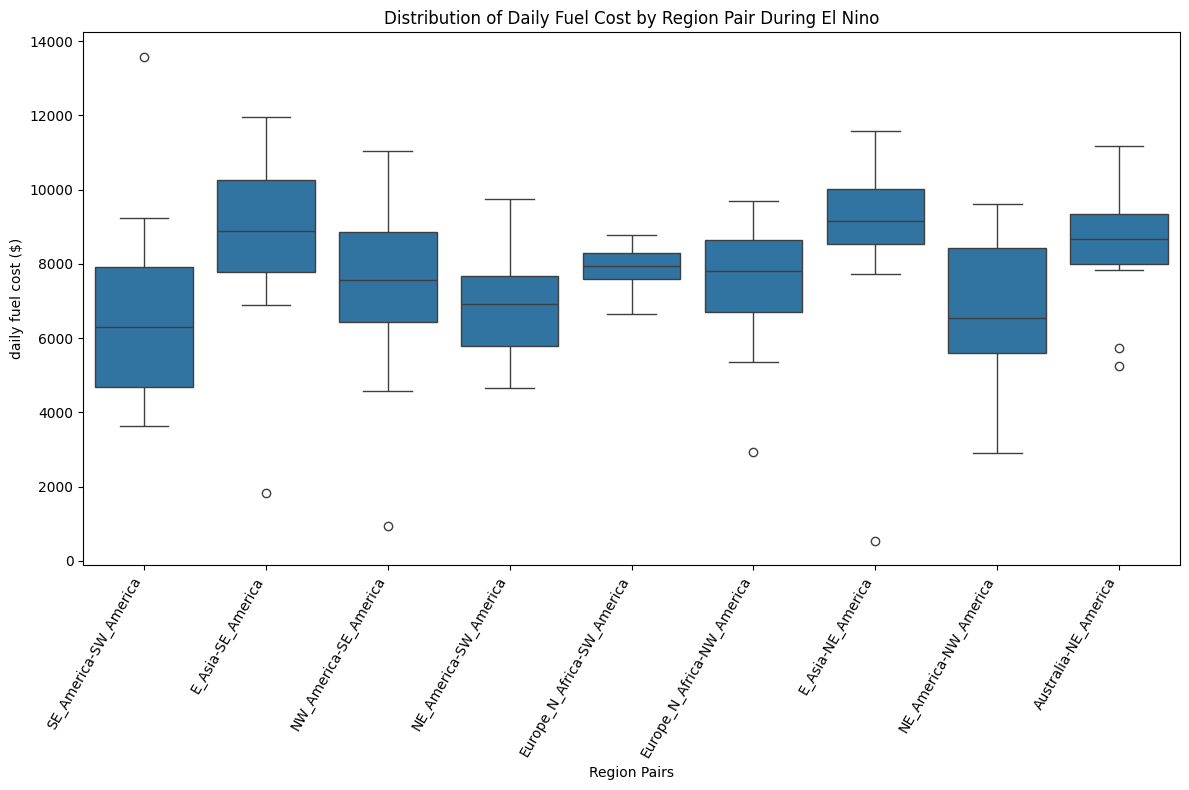

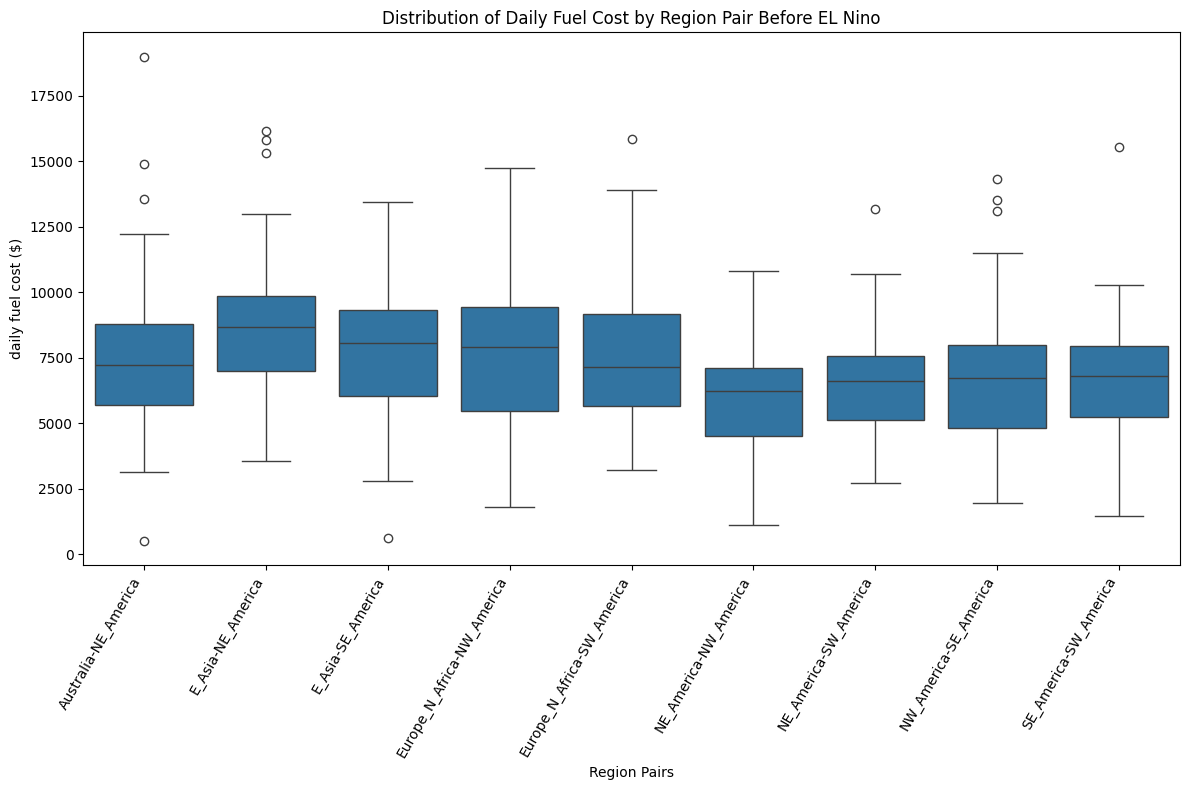

In [16]:
# Fuel cost distribution for Bulk_rerouted
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='fuel_cost', data=Bulk_rerouted)
plt.title('Distribution of Daily Fuel Cost by Region Pair During El Nino')
plt.xlabel('Region Pairs')
plt.ylabel('daily fuel cost ($)')
plt.xticks(rotation=60, ha='right')

# Format y-axis tick labels
def format_y_ticks(value, _):
    return int(value)  # Format as integer

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_y_ticks))

plt.tight_layout()
plt.show()

# Fuel cost distribution for Bulk_PA_Before_ElNino
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='fuel_cost', data=Bulk_PA_Before_ElNino)
plt.title('Distribution of Daily Fuel Cost by Region Pair Before EL Nino')
plt.xlabel('Region Pairs')
plt.ylabel('daily fuel cost ($)')
plt.xticks(rotation=60, ha='right')

# Format y-axis tick labels
def format_y_ticks(value, _):
    return int(value)  # Format as integer

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_y_ticks))

plt.tight_layout()
plt.show()

## **Daily inventory cost**

In [17]:
# Create a column inventory_cost
# Initialize the new column
Bulk_rerouted['inventory_cost'] = np.nan
Bulk_PA_Before_ElNino['inventory_cost'] = np.nan

# Calculate the inventory cost
Bulk_rerouted['inventory_cost'] = Bulk_rerouted['cargo_value']*0.25/365
Bulk_PA_Before_ElNino['inventory_cost'] = Bulk_PA_Before_ElNino['cargo_value']*0.25/365
Bulk_rerouted

,proxy_transit_month,region_pairs,voy_intake_sum,number_transits,ONI,ONI_lag_1,ONI_lag_2,ONI_lag_3,water_level_m,water_level_m_lag_1,water_level_m_lag_2,water_level_m_lag_3,IFO380,Coal_Australian,Soybeans,Maize_Corn,Wheat_HRW,Phosphate_rock,Copper,Soybean_meal,Sugar,Urea,Potassium_chloride,Zinc,Wood_Pellets,Coking_Coal,HRC_Steel,Steel,Petroleum_Coke,Salt,voy_sea_duration_h,distance_94,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,vsl_dwt,fuel_consumption_mt,cargo_value,canal_fee,Australia-NE_America,E_Asia-NE_America,E_Asia-SE_America,Europe_N_Africa-NW_America,Europe_N_Africa-SW_America,NE_America-NW_America,NE_America-SW_America,NW_America-SE_America,SE_America-SW_America,dry_season,rain_season_1st_half,rain_season_2nd_half,residuals,forecast,forecastElNino,rerouted_voy,forecast_rerouted_voy,voy_sea_duration_day,capital_cost,operating_cost,fuel_cost,daily_fuel_consumption,inventory_cost
467,2023-06-01,SE_America-SW_America,284786,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,451.725000,2850.443453,2021.0,6.475,8764.0,28.090,6743.0,21.615,37831.5,264.727411,9.720624e+06,178156.225,0,0,0,0,0,0,0,0,1,0,1,0,-1.555517,7.600000,9.555517,0.000000,-1.955517,18.821875,5437.520526,5319.138343,6882.201461,14.064880,6657.961486
468,2023-06-01,E_Asia-SE_America,37144,2,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,1382.900000,11778.460371,8463.0,27.130,14312.0,45.870,5849.0,18.740,20669.0,858.187637,1.860352e+07,117136.250,0,0,1,0,0,0,0,0,0,0,1,0,-7.590435,6.181818,9.590435,4.181818,-3.408617,57.620833,3588.239496,4677.252428,7287.760169,14.893704,12742.134690
469,2023-06-01,NW_America-SE_America,836387,17,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,388.724510,1860.826586,3661.5,11.735,12510.5,40.095,8849.0,28.360,63301.0,151.121499,9.519040e+06,207446.150,0,0,0,0,0,0,0,1,0,0,1,0,-0.512110,9.636364,17.512110,0.000000,-7.875746,16.196855,8016.465446,5997.889464,4565.485033,9.330299,6519.890356
470,2023-06-01,NE_America-SW_America,777123,22,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,453.330303,3454.833727,2940.0,9.425,10267.5,32.910,7327.5,23.485,37963.0,180.004157,1.713560e+07,178307.450,0,0,0,0,0,0,1,0,0,0,1,0,-2.012110,33.288889,24.012110,11.288889,9.276779,18.888763,5451.292139,5323.302706,4663.053302,9.529696,11736.713870
471,2023-06-01,Europe_N_Africa-SW_America,218320,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,827.022917,5485.504805,8023.0,25.710,11007.0,35.280,2984.0,9.570,35869.5,469.088036,1.860352e+07,157649.275,0,0,0,0,1,0,0,0,0,0,1,0,-5.200698,12.318182,13.200698,4.318182,-0.882517,34.459288,5231.389813,5255.917979,6660.999597,13.612818,12742.134690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2024-08-01,Europe_N_Africa-SW_America,335362,11,-0.11,0.04,0.15,0.39,26.031493,25.561315,25.030379,24.602571,510.795455,145.76,400.13,170.324757,250.85,152.5,8971.96,436.03,785.506106,342.5,294.0,2714.08,315.48,178.08,795.0,439.18,100.0,25.0,744.840909,6992.845595,8023.0,25.710,11007.0,35.280,2984

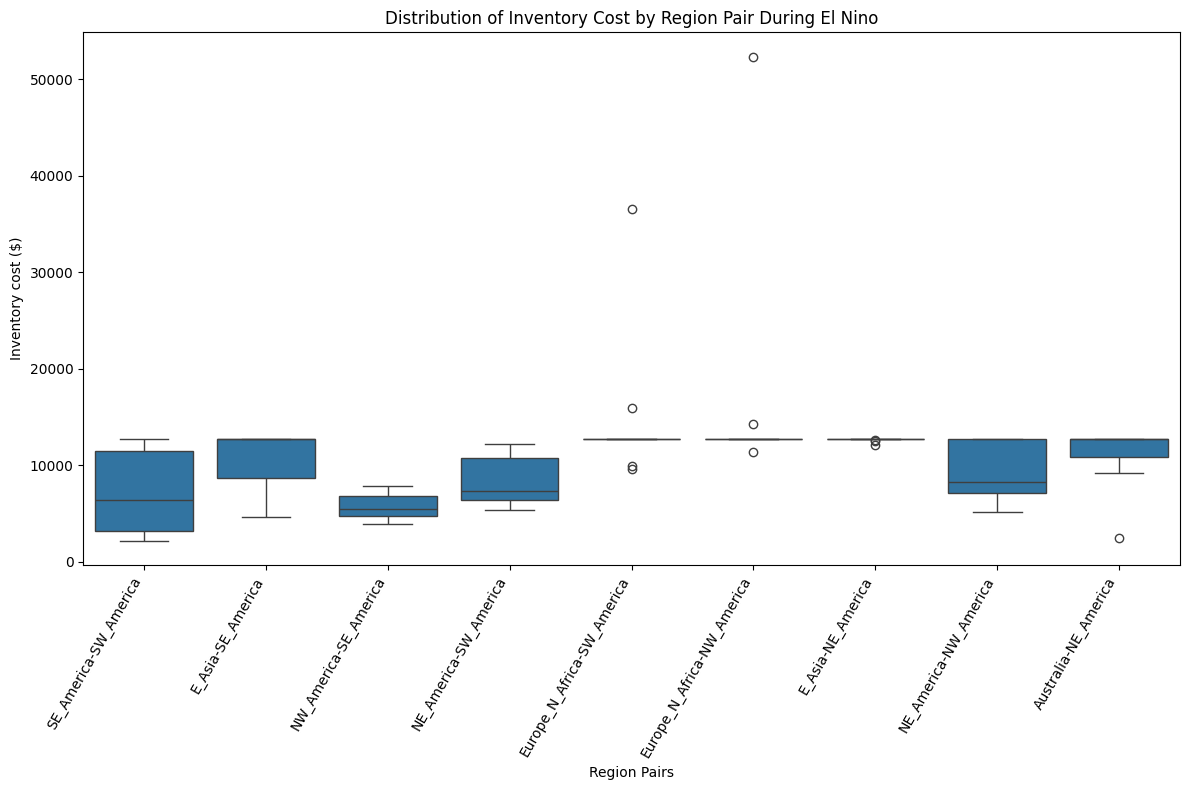

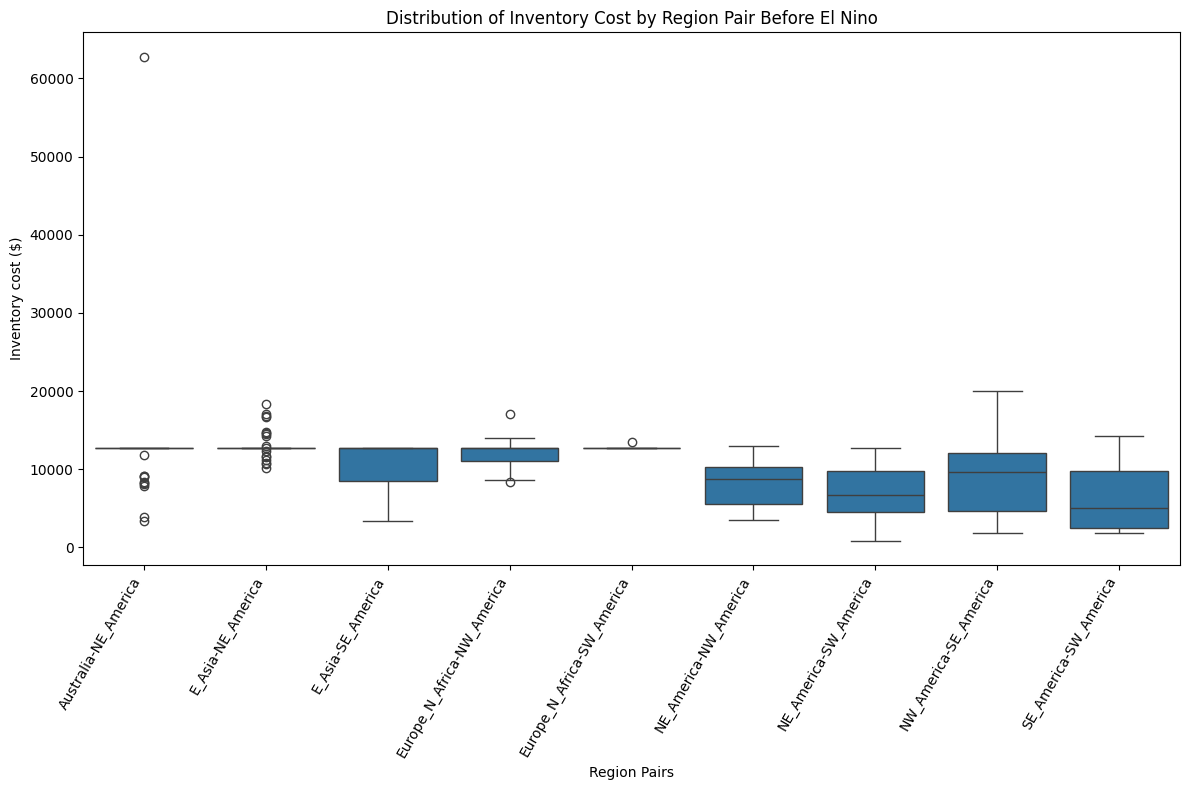

In [18]:
# Fuel cost distribution after outlier adjustment for Bulk_rerouted
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='inventory_cost', data=Bulk_rerouted)
plt.title('Distribution of Inventory Cost by Region Pair During El Nino')
plt.xlabel('Region Pairs')
plt.ylabel('Inventory cost ($)')
plt.xticks(rotation=60, ha='right')

# Format y-axis tick labels
def format_y_ticks(value, _):
    return int(value)  # Format as integer

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_y_ticks))

plt.tight_layout()
plt.show()

# Fuel cost distribution after outlier adjustment for Bulk_PA_Before_ElNino
plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='inventory_cost', data=Bulk_PA_Before_ElNino)
plt.title('Distribution of Inventory Cost by Region Pair Before El Nino')
plt.xlabel('Region Pairs')
plt.ylabel('Inventory cost ($)')
plt.xticks(rotation=60, ha='right')

# Format y-axis tick labels
def format_y_ticks(value, _):
    return int(value)  # Format as integer

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_y_ticks))

plt.tight_layout()
plt.show()

## **Emission Cost**

In [19]:
# Initialize the new column
Bulk_rerouted['emissions_cost'] = np.nan
Bulk_rerouted['emissions'] = np.nan
Bulk_PA_Before_ElNino['emissions_cost'] = np.nan
Bulk_PA_Before_ElNino['emissions'] = np.nan

# Calculate the emissions and the emissions cost
Bulk_rerouted['emissions'] = (Bulk_rerouted['daily_fuel_consumption'])*3.114
Bulk_rerouted['emissions_cost'] = Bulk_rerouted['emissions']*100
Bulk_PA_Before_ElNino['emissions'] = (Bulk_PA_Before_ElNino['daily_fuel_consumption'])*3.114
Bulk_PA_Before_ElNino['emissions_cost'] = Bulk_PA_Before_ElNino['emissions']*100

# 3.114 tonne of CO2 / 1 tonne of fuel : factor of emission from Tran et al. (2025)
# 100$ / 1 tonne of CO2e is from Tran et al. (2025)

Bulk_rerouted.head()

,proxy_transit_month,region_pairs,voy_intake_sum,number_transits,ONI,ONI_lag_1,ONI_lag_2,ONI_lag_3,water_level_m,water_level_m_lag_1,water_level_m_lag_2,water_level_m_lag_3,IFO380,Coal_Australian,Soybeans,Maize_Corn,Wheat_HRW,Phosphate_rock,Copper,Soybean_meal,Sugar,Urea,Potassium_chloride,Zinc,Wood_Pellets,Coking_Coal,HRC_Steel,Steel,Petroleum_Coke,Salt,voy_sea_duration_h,distance_94,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,vsl_dwt,fuel_consumption_mt,cargo_value,canal_fee,Australia-NE_America,E_Asia-NE_America,E_Asia-SE_America,Europe_N_Africa-NW_America,Europe_N_Africa-SW_America,NE_America-NW_America,NE_America-SW_America,NW_America-SE_America,SE_America-SW_America,dry_season,rain_season_1st_half,rain_season_2nd_half,residuals,forecast,forecastElNino,rerouted_voy,forecast_rerouted_voy,voy_sea_duration_day,capital_cost,operating_cost,fuel_cost,daily_fuel_consumption,inventory_cost,emissions_cost,emissions
467,2023-06-01,SE_America-SW_America,284786,8,0.77,0.48,0.16,-0.15,24.31857,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.5,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.1,226.38,1135.0,523.32,130.0,25.0,451.725000,2850.443453,2021.0,6.475,8764.0,28.090,6743.0,21.615,37831.5,264.727411,9.720624e+06,178156.225,0,0,0,0,0,0,0,0,1,0,1,0,-1.555517,7.600000,9.555517,0.000000,-1.955517,18.821875,5437.520526,5319.138343,6882.201461,14.064880,6657.961486,4379.803602,43.798036
468,2023-06-01,E_Asia-SE_America,37144,2,0.77,0.48,0.16,-0.15,24.31857,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.5,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.1,226.38,1135.0,523.32,130.0,25.0,1382.900000,11778.460371,8463.0,27.130,14312.0,45.870,5849.0,18.740,20669.0,858.187637,1.860352e+07,117136.250,0,0,1,0,0,0,0,0,0,0,1,0,-7.590435,6.181818,9.590435,4.181818,-3.408617,57.620833,3588.239496,4677.252428,7287.760169,14.893704,12742.134690,4637.899430,46.378994
469,2023-06-01,NW_America-SE_America,836387,17,0.77,0.48,0.16,-0.15,24.31857,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.5,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.1,226.38,1135.0,523.32,130.0,25.0,388.724510,1860.826586,3661.5,11.735,12510.5,40.095,8849.0,28.360,63301.0,151.121499,9.519040e+06,207446.150,0,0,0,0,0,0,0,1,0,0,1,0,-0.512110,9.636364,17.512110,0.000000,-7.875746,16.196855,8016.465446,5997.889464,4565.485033,9.330299,6519.890356,2905.455166,29.054552
470,2023-06-01,NE_America-SW_America,777123,22,0.77,0.48,0.16,-0.15,24.31857,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.5,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.1,226.38,1135.0,523.32,130.0,25.0,453.330303,3454.833727,2940.0,9.425,10267.5,32.910,7327.5,23.485,37963.0,180.004157,1.713560e+07,178307.450,0,0,0,0,0,0,1,0,0,0,1,0,-2.012110,33.288889,24.012110,11.288889,9.276779,18.888763,5451.292139,5323.302706,4663.053302,9.529696,11736.713870,2967.547196,29.675472
471,2023-06-01,Europe_N_Africa-SW_America,218320,8,0.77,0.48,0.16,-0.15,24.31857,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.5,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.1,226.38,1135.0,523.32,130.0,25.0,827.022917,5485.504805,8023.0,25.710,11007.0,35.280,2984.0,9.570,35869.5,469.088036,1.860352e+07,157649.275,0,0,0,0,1,0,0,0,0,0,1,0,-5.200698,12.318182,13.200698,4.318182,-0.882517,34.459288,5231.389813,5255.917979,6660.999597,13.612818,12742.134690,4239.031680,42.390317


# **Total Cost Calculation**

In [20]:
# Initialize the new column - daily total cost
Bulk_rerouted['daily_total_cost'] = np.nan
Bulk_PA_Before_ElNino['daily_total_cost'] = np.nan

# Calculate the daily total cost
Bulk_rerouted['daily_total_cost'] = Bulk_rerouted['capital_cost'] + Bulk_rerouted['operating_cost'] + Bulk_rerouted['fuel_cost'] + Bulk_rerouted['inventory_cost']+ Bulk_rerouted['emissions_cost']
Bulk_PA_Before_ElNino['daily_total_cost'] = Bulk_PA_Before_ElNino['capital_cost'] + Bulk_PA_Before_ElNino['operating_cost'] + Bulk_PA_Before_ElNino['fuel_cost'] + Bulk_PA_Before_ElNino['inventory_cost']+ Bulk_PA_Before_ElNino['emissions_cost']


In [21]:
# Costs for rerouted voyages
# Calculate the total cost
Bulk_rerouted['rerouted_voy_total_cost'] = Bulk_rerouted['daily_total_cost']*Bulk_rerouted['second_shortest_distance_day']

# Calculate the total cost
Bulk_rerouted['rerouted_total_cost'] = Bulk_rerouted['rerouted_voy_total_cost']*Bulk_rerouted['rerouted_voy']

In [22]:
# Costs for transited voyages
# Calculate the total cost
Bulk_rerouted['transit_voy_total_cost'] =  Bulk_rerouted['canal_fee']+Bulk_rerouted['daily_total_cost']*Bulk_rerouted['voy_sea_duration_day']
Bulk_PA_Before_ElNino['transit_voy_total_cost'] =  Bulk_PA_Before_ElNino['canal_fee']+Bulk_PA_Before_ElNino['daily_total_cost']*Bulk_PA_Before_ElNino['voy_sea_duration_day']

# Calculate the total cost
Bulk_rerouted['transit_total_cost'] =Bulk_rerouted['transit_voy_total_cost']*Bulk_rerouted['number_transits']
Bulk_PA_Before_ElNino['transit_total_cost'] =Bulk_PA_Before_ElNino['transit_voy_total_cost']*Bulk_PA_Before_ElNino['number_transits']

In [23]:
Bulk_rerouted

,proxy_transit_month,region_pairs,voy_intake_sum,number_transits,ONI,ONI_lag_1,ONI_lag_2,ONI_lag_3,water_level_m,water_level_m_lag_1,water_level_m_lag_2,water_level_m_lag_3,IFO380,Coal_Australian,Soybeans,Maize_Corn,Wheat_HRW,Phosphate_rock,Copper,Soybean_meal,Sugar,Urea,Potassium_chloride,Zinc,Wood_Pellets,Coking_Coal,HRC_Steel,Steel,Petroleum_Coke,Salt,voy_sea_duration_h,distance_94,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,vsl_dwt,fuel_consumption_mt,cargo_value,canal_fee,Australia-NE_America,E_Asia-NE_America,E_Asia-SE_America,Europe_N_Africa-NW_America,Europe_N_Africa-SW_America,NE_America-NW_America,NE_America-SW_America,NW_America-SE_America,SE_America-SW_America,dry_season,rain_season_1st_half,rain_season_2nd_half,residuals,forecast,forecastElNino,rerouted_voy,forecast_rerouted_voy,voy_sea_duration_day,capital_cost,operating_cost,fuel_cost,daily_fuel_consumption,inventory_cost,emissions_cost,emissions,daily_total_cost,rerouted_voy_total_cost,rerouted_total_cost,transit_voy_total_cost,transit_total_cost
467,2023-06-01,SE_America-SW_America,284786,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,451.725000,2850.443453,2021.0,6.475,8764.0,28.090,6743.0,21.615,37831.5,264.727411,9.720624e+06,178156.225,0,0,0,0,0,0,0,0,1,0,1,0,-1.555517,7.600000,9.555517,0.000000,-1.955517,18.821875,5437.520526,5319.138343,6882.201461,14.064880,6657.961486,4379.803602,43.798036,28676.625418,8.055264e+05,0.000000e+00,7.179041e+05,5.743233e+06
468,2023-06-01,E_Asia-SE_America,37144,2,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,1382.900000,11778.460371,8463.0,27.130,14312.0,45.870,5849.0,18.740,20669.0,858.187637,1.860352e+07,117136.250,0,0,1,0,0,0,0,0,0,0,1,0,-7.590435,6.181818,9.590435,4.181818,-3.408617,57.620833,3588.239496,4677.252428,7287.760169,14.893704,12742.134690,4637.899430,46.378994,32933.286215,1.510650e+06,6.317263e+06,2.014780e+06,4.029559e+06
469,2023-06-01,NW_America-SE_America,836387,17,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,388.724510,1860.826586,3661.5,11.735,12510.5,40.095,8849.0,28.360,63301.0,151.121499,9.519040e+06,207446.150,0,0,0,0,0,0,0,1,0,0,1,0,-0.512110,9.636364,17.512110,0.000000,-7.875746,16.196855,8016.465446,5997.889464,4565.485033,9.330299,6519.890356,2905.455166,29.054552,28005.185465,1.122868e+06,0.000000e+00,6.610421e+05,1.123772e+07
470,2023-06-01,NE_America-SW_America,777123,22,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,453.330303,3454.833727,2940.0,9.425,10267.5,32.910,7327.5,23.485,37963.0,180.004157,1.713560e+07,178307.450,0,0,0,0,0,0,1,0,0,0,1,0,-2.012110,33.288889,24.012110,11.288889,9.276779,18.888763,5451.292139,5323.302706,4663.053302,9.529696,11736.713870,2967.547196,29.675472,30141.909213,9.919702e+05,1.119824e+07,7.476508e+05,1.644832e+07
471,2023-06-01,Europe_N_Africa-SW_America,218320,8,0.77,0.48,0.16,-0.15,24.318570,24.667956,25.300737,25.745768,489.318182,139.42,591.89,266.867798,345.50,344.5,8396.52,491.56,909.185288,287.5,328.0,2375.45,419.10,226.38,1135.0,523.32,130.0,25.0,827.022917,5485.504805,8023.0,25.710,11007.0,35.280,2984.0,9.570,35869.5,469.088036,1.860352e+07,157649.275,0,0,0,0,1,0,0,0,0,0,1,0,-5.200698,12.318182,13.200698,4.318182,-0.882517,34.459288,5231.389813,5255.917979,6660.999597,13.612818,12742.134690,4239.031680,42.390317,34129.473759,1.204088e+06,5.199470e+06,1.333727e+06,1.066981e+07
...

# **Emissions Analysis**

In [24]:
# Estimate the amount of increased emissions
# Calculate the total emissions for rerouted voyages per row
Bulk_rerouted['rerouted_voy_emissions'] = Bulk_rerouted['emissions'] * Bulk_rerouted['second_shortest_distance_day'] * Bulk_rerouted['rerouted_voy']
Bulk_rerouted['transit_voy_emissions'] = (Bulk_rerouted['fuel_consumption_mt']* 3.114) * Bulk_rerouted['number_transits']
# Calculate the total emissions for all rerouted voyages
total_rerouted_emissions = Bulk_rerouted['rerouted_voy_emissions'].sum()
# Call the .sum() method to get the numerical value
total_ElNino_emissions = (Bulk_rerouted['transit_voy_emissions'] + Bulk_rerouted['rerouted_voy_emissions']).sum()
# Print the total emissions
print(f"Total emissions from all rerouted vessels: {total_rerouted_emissions:.2f} tonnes of CO2")
print(f"Total emissions from all vessels during El Nino: {total_ElNino_emissions:.2f} tonnes of CO2")

# Emissions if no El Nino
Bulk_rerouted['emissions_normal_conditions'] = (Bulk_rerouted['fuel_consumption_mt'] * (Bulk_rerouted['rerouted_voy'] + Bulk_rerouted['number_transits'])) * 3.114
total_emissions_normal_conditions = Bulk_rerouted['emissions_normal_conditions'].sum()
print(f"Total emissions  from all vessels if base scenario (no El Nino): {total_emissions_normal_conditions:.2f} tonnes of CO2")

# Calculate the increase in total emissions
increase_in_emissions = total_ElNino_emissions - total_emissions_normal_conditions
print(f"Increase in total emissions: {increase_in_emissions:.2f} tonnes of CO2")

# Calculate the percentage increase
increase_in_emissions_percentage = (increase_in_emissions / total_emissions_normal_conditions) * 100
print(f"Increase in total emissions: {increase_in_emissions_percentage:.2f} %")

Total emissions from all rerouted vessels: 2296376.80 tonnes of CO2
Total emissions from all vessels during El Nino: 4294392.29 tonnes of CO2
Total emissions  from all vessels if base scenario (no El Nino): 3715019.99 tonnes of CO2
Increase in total emissions: 579372.30 tonnes of CO2
Increase in total emissions: 15.60 %


In [48]:
# Create a table to identify the total emissions increase during El Nino and comapre it to a hypothetical normal scenario
rerouted_emissions_by_region = Bulk_rerouted.groupby('region_pairs', observed=False)['rerouted_voy_emissions'].sum()
elnino_emissions_by_region = Bulk_rerouted.groupby('region_pairs', observed=False)[['transit_voy_emissions', 'rerouted_voy_emissions']].sum().sum(axis=1)
# Calculate the total emissions if no El Nino, grouped by region_pairs
normal_emissions_by_region = Bulk_rerouted.groupby('region_pairs', observed=False)['emissions_normal_conditions'].sum()

# Create a DataFrame to store the results
emissions_summary_by_region = pd.DataFrame({
    'elnino_emissions': elnino_emissions_by_region,
    'normal_emissions': normal_emissions_by_region
})

# Calculate the increase in total emissions
emissions_summary_by_region['increase_in_emissions'] = emissions_summary_by_region['elnino_emissions'] - emissions_summary_by_region['normal_emissions']

# Calculate the percentage increase for each region
emissions_summary_by_region['increase_in_emissions_%'] = (emissions_summary_by_region['increase_in_emissions'] / emissions_summary_by_region['normal_emissions']) * 100

# Add a 'Total' row
total_row = emissions_summary_by_region.sum()

# Filter by increase_in_emissions_% in descending order
emissions_summary_by_region = emissions_summary_by_region.sort_values(by='increase_in_emissions_%', ascending=False)

# Calculate the total percentage increase separately for the 'Total' row
total_row['increase_in_emissions_%'] = (total_row['increase_in_emissions'] / total_row['normal_emissions']) * 100

emissions_summary_by_region.loc['Total'] = total_row
columns_to_int = ['elnino_emissions', 'normal_emissions', 'increase_in_emissions']
emissions_summary_by_region[columns_to_int] = emissions_summary_by_region[columns_to_int].astype(int)

# Reset the index to make 'region_pairs' a column
emissions_summary_by_region = emissions_summary_by_region.reset_index()

# Rename the index column to 'Region Pair'
emissions_summary_by_region = emissions_summary_by_region.rename(columns={'region_pairs': 'Region Pairs'})

# Rename columns for display
emissions_summary_by_region = emissions_summary_by_region.rename(columns={
    'elnino_emissions': 'Emissions during El Nino (t CO2)',
    'normal_emissions': 'Emissions in normal conditions (t CO2)',
    'increase_in_emissions': 'Absolute Increase in emissions (t CO2)',
    'increase_in_emissions_%': 'Relative Increase in emissions (%)'
})


# Set pandas display option for integer columns
pd.options.display.float_format = '{:,.0f}'.format

# Display the results in a table
display(emissions_summary_by_region)

,Region Pairs,Emissions during El Nino (t CO2),Emissions in normal conditions (t CO2),Absolute Increase in emissions (t CO2),Relative Increase in emissions (%)
0,SE_America-SW_America,82602,49228,33373,68
1,NE_America-NW_America,307663,191262,116400,61
2,NE_America-SW_America,474674,330517,144156,44
3,NW_America-SE_America,179534,130984,48549,37
4,Europe_N_Africa-NW_America,595812,527990,67821,13
5,E_Asia-NE_America,2191494,2034639,156854,8
6,Australia-NE_America,64662,62630,2032,3
7,Europe_N_Africa-SW_America,240483,233577,6905,3
8,E_Asia-SE_America,157465,154187,3277,2
9,Total,4294392,3715019,579372,16


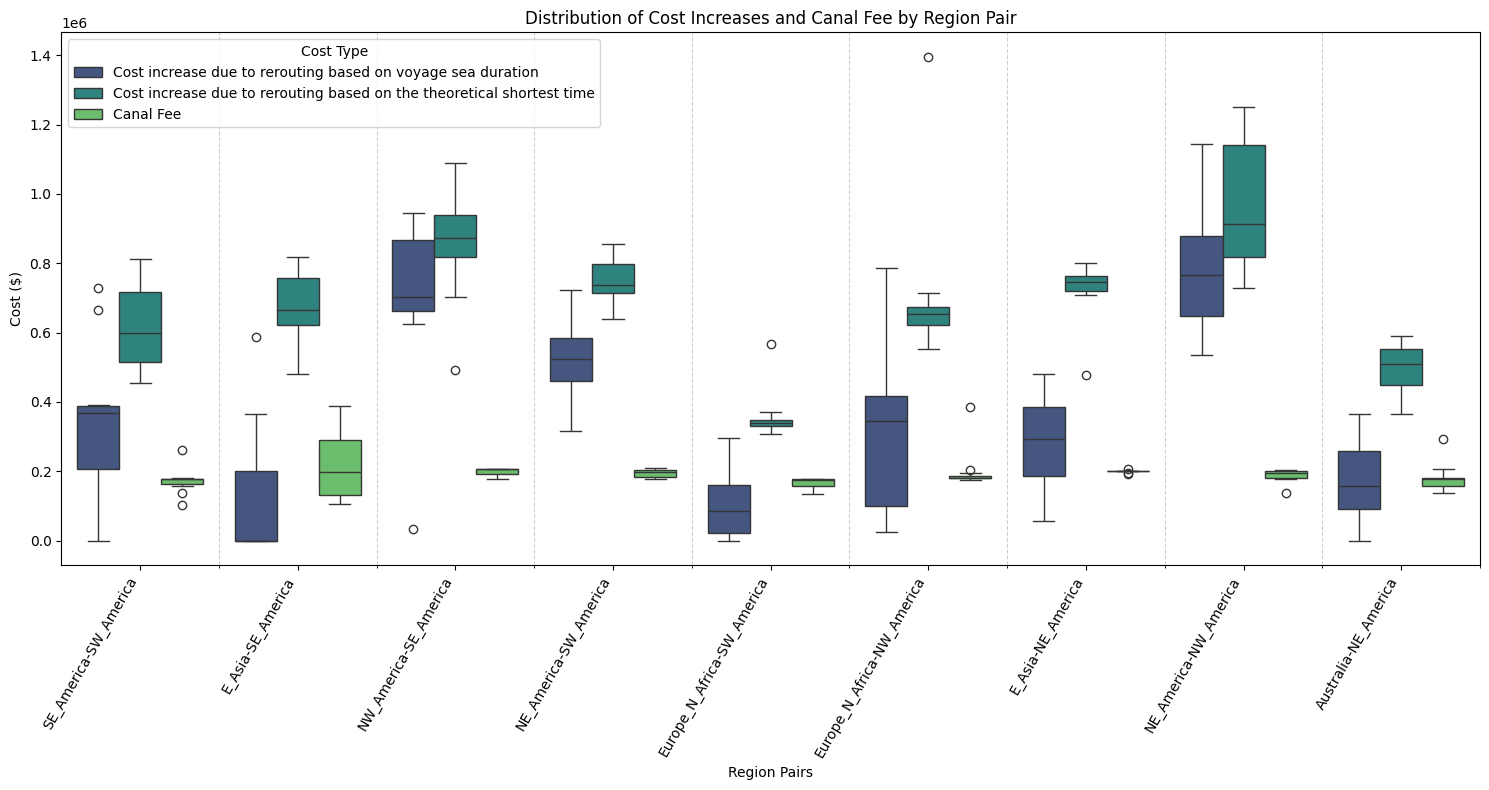

In [26]:
# Cost Differential Analysis
#Create new variables
Bulk_rerouted['cost_increase_voy_sea_duration'] = Bulk_rerouted['daily_total_cost'] * (Bulk_rerouted['second_shortest_distance_day'] - Bulk_rerouted['voy_sea_duration_day'])
# Replace values less than 0 in 'cost_increase_voy_sea_duration' with 0
# The clip(lower=0) method replaces all values below the specified lower bound with the lower bound.
Bulk_rerouted['cost_increase_voy_sea_duration'] = Bulk_rerouted['cost_increase_voy_sea_duration'].clip(lower=0)

Bulk_rerouted['cost_increase_shortest_distance_day'] = Bulk_rerouted['daily_total_cost'] * (Bulk_rerouted['second_shortest_distance_day'] - Bulk_rerouted['shortest_distance_day'])

# Creat a box plot per region pair
# Melt the DataFrame to have 'variable' and 'value' columns for plotting
df_melted_costs = Bulk_rerouted.melt(
    id_vars=['region_pairs'],
    value_vars=['cost_increase_voy_sea_duration', 'cost_increase_shortest_distance_day', 'canal_fee'],
    var_name='Cost Type',
    value_name='Cost Differential'
)

# Rename the Cost Type values for the legend
cost_type_names = {
    'cost_increase_voy_sea_duration': 'Cost increase due to rerouting based on voyage sea duration',
    'cost_increase_shortest_distance_day': 'Cost increase due to rerouting based on the theoretical shortest time',
    'canal_fee': 'Canal Fee'
}
df_melted_costs['Cost Type'] = df_melted_costs['Cost Type'].map(cost_type_names)


plt.figure(figsize=(15, 8))
sns.boxplot(x='region_pairs', y='Cost Differential', hue='Cost Type', data=df_melted_costs, palette='viridis')
plt.title('Distribution of Cost Increases and Canal Fee by Region Pair')
plt.xlabel('Region Pairs')
plt.ylabel('Cost ($)')
plt.xticks(rotation=60, ha='right')

# Get the current axes
ax = plt.gca()

# Set minor tick locations manually between the major ticks
ax.xaxis.set_minor_locator(mticker.FixedLocator(np.arange(0.5, len(Bulk_rerouted['region_pairs'].unique()), 1)))

# Add vertical minor grid lines
ax.xaxis.grid(which='minor', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [73]:
# Group by region_pairs and calculate the sum of cost increase and cargo intake
cost_impact_by_region = Bulk_rerouted.groupby('region_pairs', observed=False).agg(
    number_rerouted=('rerouted_voy', 'sum'),
    total_cost_increase=('cost_increase_voy_sea_duration', 'sum')
)

# Calculate the average of voy_intake_mt for each region pair
Bulk_PA_Before_ElNino['voy_intake_mean'] = Bulk_PA_Before_ElNino['voy_intake_sum']/Bulk_PA_Before_ElNino['number_transits']
average_voy_intake_before_elnino = Bulk_PA_Before_ElNino.groupby('region_pairs', observed=False)['voy_intake_mean'].mean()
rerouted_voy_elnino = Bulk_rerouted.groupby('region_pairs', observed=False)['rerouted_voy'].sum()
# Merge average_voy_intake_before_elnino and rerouted_voy_elnino on index
voyage_intake = pd.merge(average_voy_intake_before_elnino, rerouted_voy_elnino, left_index=True, right_index=True)
# Calculate the total transported cargo capacity per region for the rerouted vessels
voyage_intake['total_cargo_intake'] = voyage_intake['rerouted_voy'] * voyage_intake['voy_intake_mean']
# voyage_intake['total_cargo_intake'] to cost_impact_by_region by region_pair
cost_impact_by_region = cost_impact_by_region.merge(voyage_intake['total_cargo_intake'], left_index=True, right_index=True)

# Calculate the cost increase per tonne for each region pair
# Using the total cargo intake calculated during El Nino (total_cargo_intake)
cost_impact_by_region['cost_increase_per_tonne'] = cost_impact_by_region['total_cost_increase'] / cost_impact_by_region['total_cargo_intake']


# Filter in descending for Cost Increase per Tonne
cost_impact_by_region = cost_impact_by_region.sort_values(by='cost_increase_per_tonne', ascending=False)

# Rename columns for better readability
cost_impact_by_region = cost_impact_by_region.rename(columns={
    'number_rerouted': 'Number of Rerouted Vessels',
    'total_cost_increase': 'Total Cost Increase ($)',
    'total_cargo_intake': 'Total Cargo Transported (tonnes)',
    'cost_increase_per_tonne': 'Cost Increase per Tonne ($)'
})

# Add a 'Total' row with sum of cost increase and cargo intake
total_rerouted_sum = cost_impact_by_region['Number of Rerouted Vessels'].sum()
total_cost_increase_sum = cost_impact_by_region['Total Cost Increase ($)'].sum()
total_cargo_intake_sum = cost_impact_by_region['Total Cargo Transported (tonnes)'].sum()

# Calculate the cost increase per tonne for the 'Total' row
total_cost_increase_per_tonne = total_cost_increase_sum / total_cargo_intake_sum

# Create the 'Total' row as a pandas Series
total_row = pd.Series({
    'Number of Rerouted Vessels': total_rerouted_sum,
    'Total Cost Increase ($)': total_cost_increase_sum,
    'Total Cargo Transported (tonnes)': total_cargo_intake_sum,
    'Cost Increase per Tonne ($)': total_cost_increase_per_tonne
}, name='Total')

# Add the 'Total' row to the DataFrame
cost_impact_by_region = pd.concat([cost_impact_by_region, pd.DataFrame([total_row])])

# Reset the index to make the index a column
cost_impact_by_region = cost_impact_by_region.reset_index()

# Rename the index column to 'Region Pair'
cost_impact_by_region = cost_impact_by_region.rename(columns={'index': 'Region Pairs'})


# Set pandas display option to show different decimal places for specific columns
pd.options.display.float_format = lambda x: '{:,.0f}'.format(x) if abs(x) >= 10 else '{:,.2f}'.format(x)


# Display the table
display(cost_impact_by_region)

,Region Pairs,Number of Rerouted Vessels,Total Cost Increase ($),Total Cargo Transported (tonnes),Cost Increase per Tonne ($)
0,Australia-NE_America,11,"1,906,502","370,030",5.15
1,NW_America-SE_America,47,"10,636,954","2,325,507",4.57
2,NE_America-NW_America,107,"11,789,952","4,121,294",2.86
3,SE_America-SW_America,59,"3,778,196","2,717,198",1.39
4,E_Asia-SE_America,32,"1,402,810","1,451,862",0.97
5,NE_America-SW_America,222,"7,729,752","8,450,880",0.91
6,Europe_N_Africa-SW_America,63,"1,335,297","1,961,453",0.68
7,Europe_N_Africa-NW_America,194,"4,474,603","8,597,379",0.52
8,E_Asia-NE_America,437,"4,269,812","20,047,718",0.21
9,Total,"1,172","47,323,878","50,043,320",0.95


# **Data Analysis**

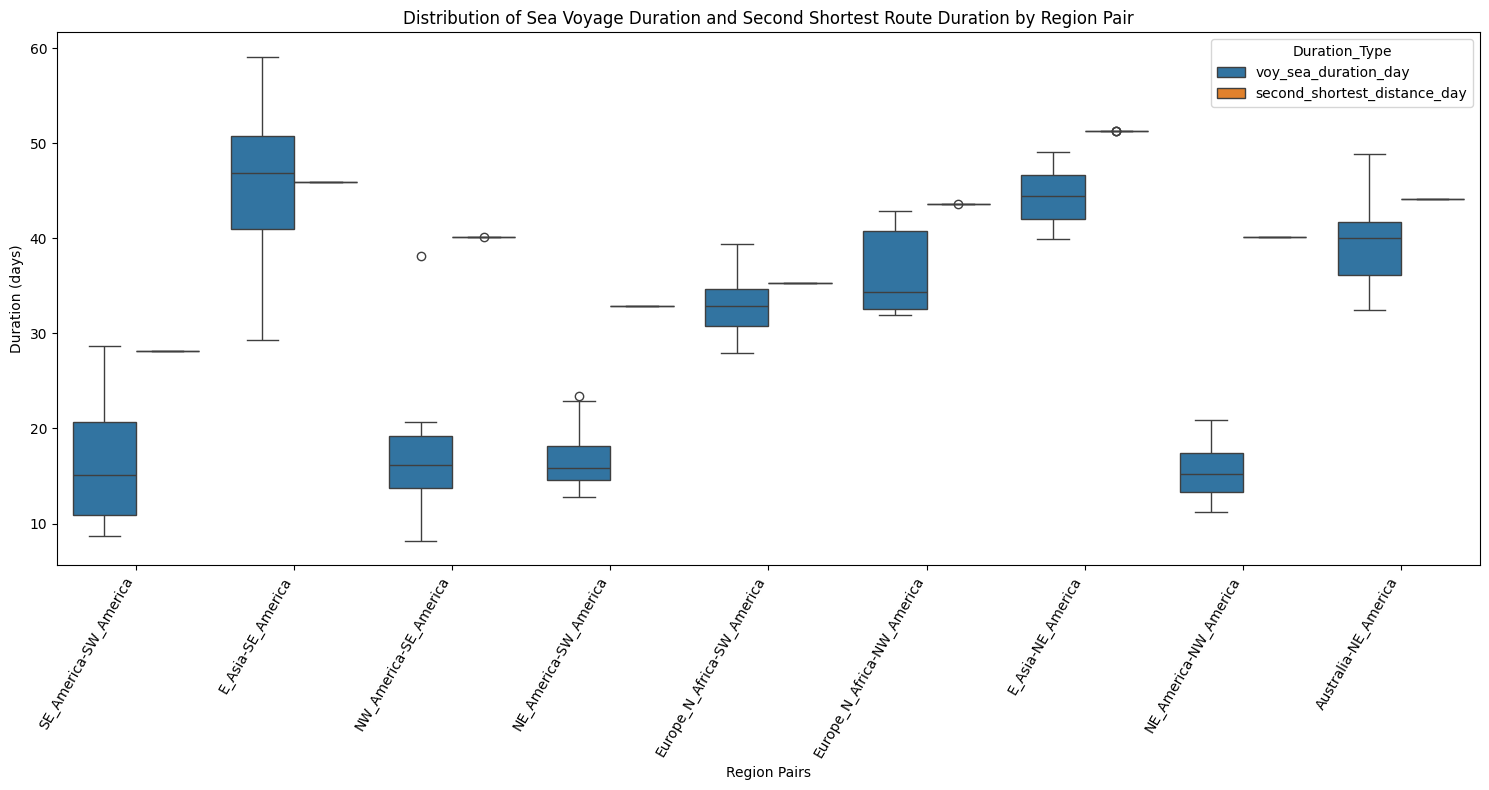

In [30]:
# voy_sea_duration_day vs second_shourtest_route_days analysis per region pair
# Melt the DataFrame to have 'variable' and 'value' columns for plotting
df_melted = Bulk_rerouted.melt(
    id_vars=['region_pairs'],
    value_vars=['voy_sea_duration_day', 'second_shortest_distance_day'],
    var_name='Duration_Type',
    value_name='Duration_Days'
)

plt.figure(figsize=(15, 8))
sns.boxplot(x='region_pairs', y='Duration_Days', hue='Duration_Type', data=df_melted)
plt.title('Distribution of Sea Voyage Duration and Second Shortest Route Duration by Region Pair')
plt.xlabel('Region Pairs')
plt.ylabel('Duration (days)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

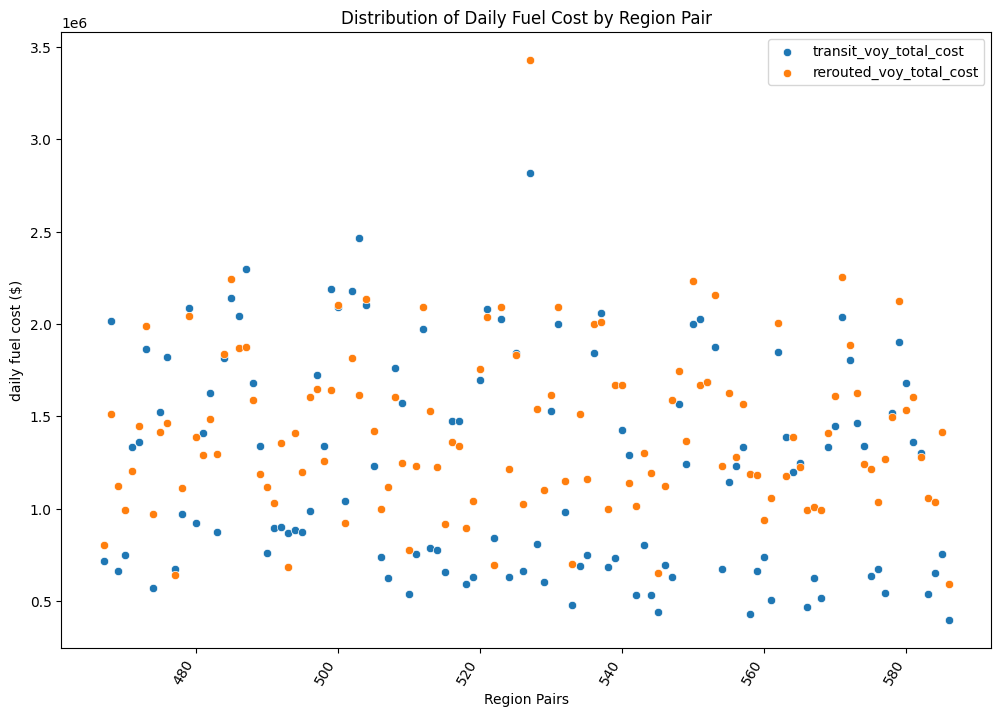

In [31]:
# Analysis transit_voy_total_cost VS rerouted_voy_total_cost
Bulk_rerouted['index']=Bulk_rerouted.index
plt.figure(figsize=(12, 8))
sns.scatterplot(x='index', y='transit_voy_total_cost', data=Bulk_rerouted)
sns.scatterplot(x='index', y='rerouted_voy_total_cost', data=Bulk_rerouted)
#sns.scatterplot(x='index', y='transit_voy_total_cost', data=Bulk_PA_Before_ElNino)
plt.title('Distribution of Daily Fuel Cost by Region Pair')
plt.xlabel('Region Pairs')
plt.ylabel('daily fuel cost ($)')
plt.xticks(rotation=60, ha='right')

#add legend
plt.legend(['transit_voy_total_cost', 'rerouted_voy_total_cost'])

(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.]),
 [Text(-10.0, 0, '−10'),
  Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

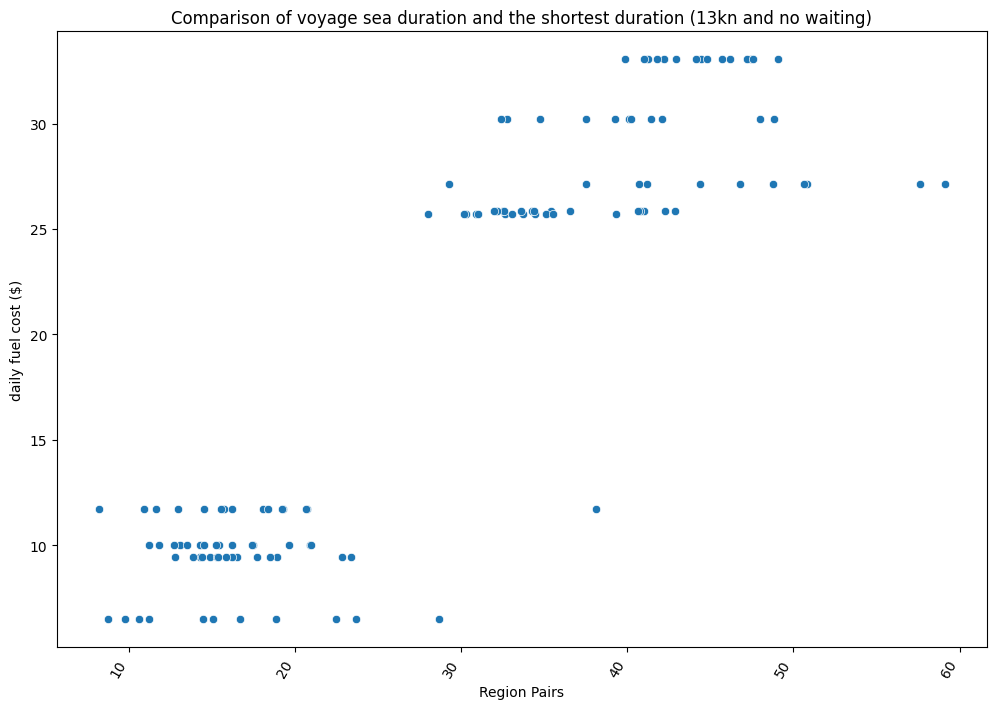

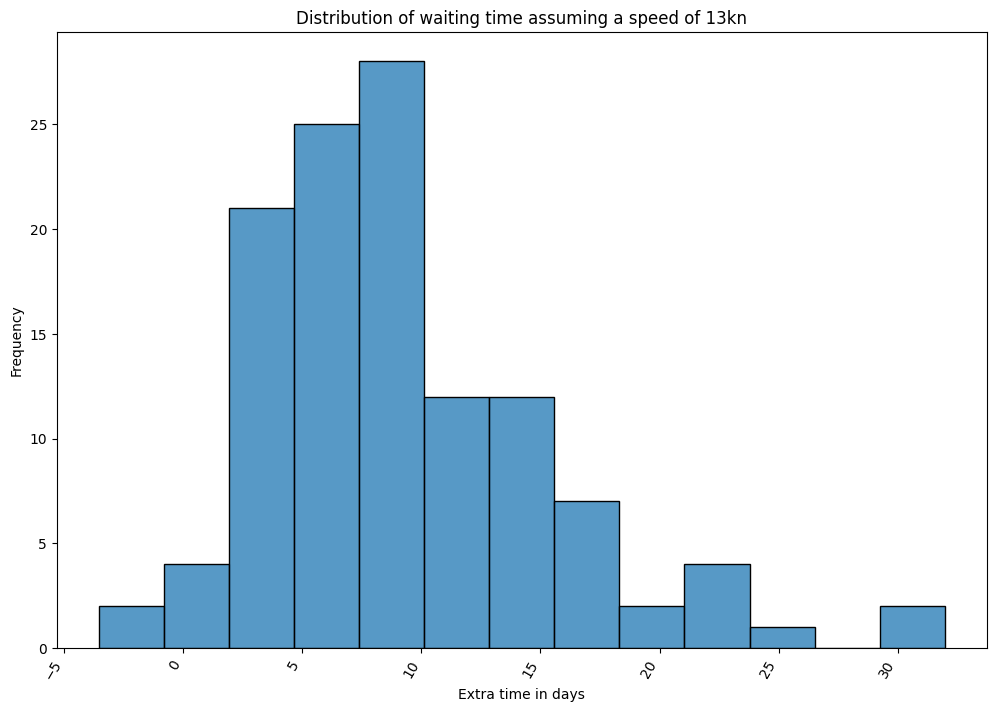

In [32]:
# Voy_sea_duration_h VS shortest_detour_day

# Add the calculated columns to the DataFrame
Bulk_rerouted['transit_time_day'] = Bulk_rerouted['voy_sea_duration_day'] - Bulk_rerouted['shortest_distance_day']


plt.figure(figsize=(12, 8))
# Use the column names from the DataFrame
sns.scatterplot(x='voy_sea_duration_day', y='shortest_distance_day', data=Bulk_rerouted)
plt.title('Comparison of voyage sea duration and the shortest duration (13kn and no waiting)')
plt.xlabel('Region Pairs')
plt.ylabel('daily fuel cost ($)')
plt.xticks(rotation=60, ha='right')

#histogram of transit_time_day
plt.figure(figsize=(12, 8))
sns.histplot(x='transit_time_day', data=Bulk_rerouted)
plt.title('Distribution of waiting time assuming a speed of 13kn')
plt.xlabel('Extra time in days')
plt.ylabel('Frequency')
plt.xticks(rotation=60, ha='right')

,transit_voy_total_cost
count,120
mean,"1,227,964"
std,"577,921"
min,"398,746"
25%,"690,360"
50%,"1,231,851"
75%,"1,702,791"
max,"2,819,221"


,rerouted_voy_total_cost
count,120
mean,"1,415,723"
std,"439,625"
min,"590,230"
25%,"1,118,121"
50%,"1,358,648"
75%,"1,645,228"
max,"3,429,407"


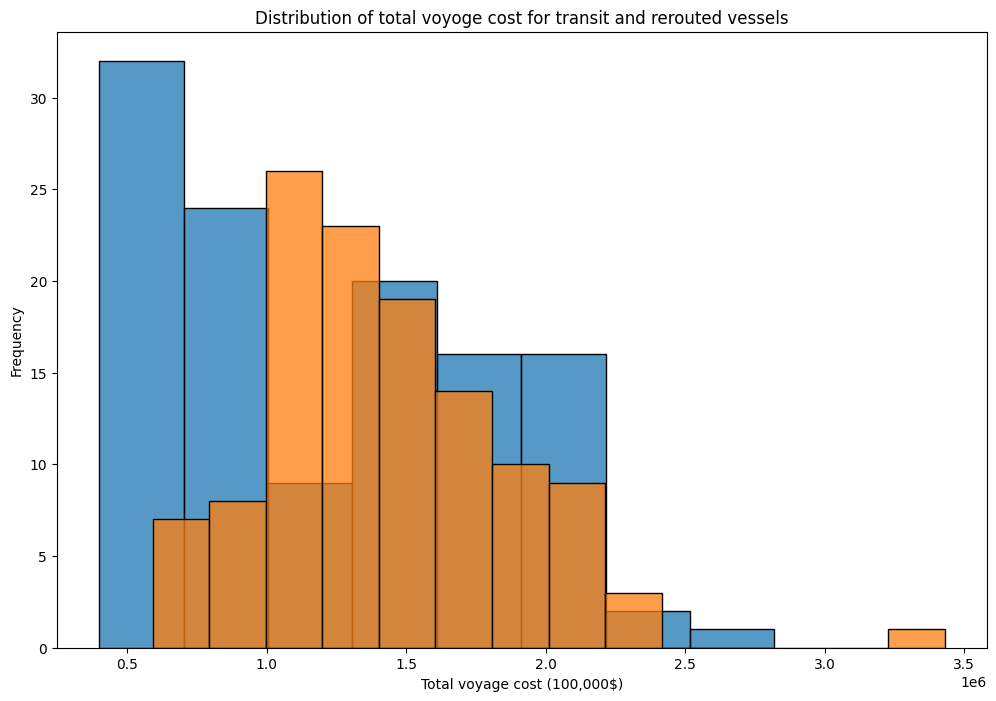

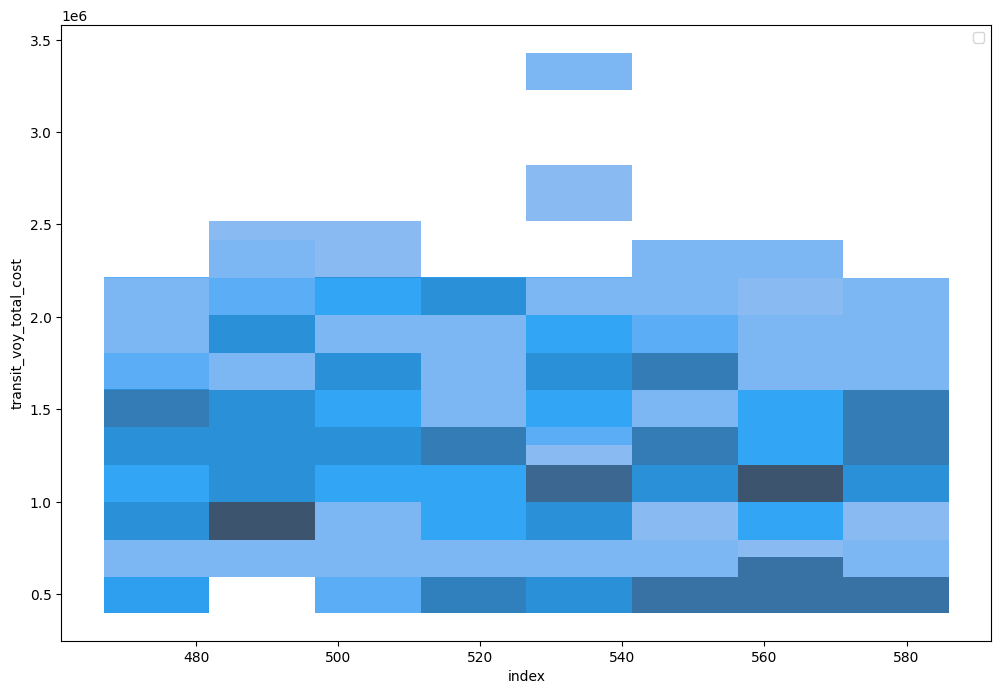

In [33]:
# Histogram of transit_voy_total_cost
plt.figure(figsize=(12, 8))
sns.histplot(x='transit_voy_total_cost', data=Bulk_rerouted)

sns.histplot(x='rerouted_voy_total_cost', data=Bulk_rerouted)
plt.title('Distribution of total voyoge cost for transit and rerouted vessels')
plt.xlabel('Total voyage cost (100,000$)')
plt.ylabel('Frequency')



# Analysis transit_voy_total_cost VS rerouted_voy_total_cost
Bulk_rerouted['index']=Bulk_rerouted.index
plt.figure(figsize=(12, 8))
sns.histplot(x='index', y='transit_voy_total_cost', data=Bulk_rerouted)
sns.histplot(x='index', y='rerouted_voy_total_cost', data=Bulk_rerouted)

#add legend
plt.legend(['transit_voy_total_cost', 'rerouted_voy_total_cost'])

# statistics of the variables
display(Bulk_rerouted['transit_voy_total_cost'].describe())
display(Bulk_rerouted['rerouted_voy_total_cost'].describe())

In [34]:
# Sum of rerouted total cost and of transit total cost
print(Bulk_rerouted['rerouted_total_cost'].sum())
print(Bulk_rerouted['transit_total_cost'].sum())

1860736193.40233
1799746880.9600668


In [35]:
Bulk_rerouted.head()

,proxy_transit_month,region_pairs,voy_intake_sum,number_transits,ONI,ONI_lag_1,ONI_lag_2,ONI_lag_3,water_level_m,water_level_m_lag_1,water_level_m_lag_2,water_level_m_lag_3,IFO380,Coal_Australian,Soybeans,Maize_Corn,Wheat_HRW,Phosphate_rock,Copper,Soybean_meal,Sugar,Urea,Potassium_chloride,Zinc,Wood_Pellets,Coking_Coal,HRC_Steel,Steel,Petroleum_Coke,Salt,voy_sea_duration_h,distance_94,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,vsl_dwt,fuel_consumption_mt,cargo_value,canal_fee,Australia-NE_America,E_Asia-NE_America,E_Asia-SE_America,Europe_N_Africa-NW_America,Europe_N_Africa-SW_America,NE_America-NW_America,NE_America-SW_America,NW_America-SE_America,SE_America-SW_America,dry_season,rain_season_1st_half,rain_season_2nd_half,residuals,forecast,forecastElNino,rerouted_voy,forecast_rerouted_voy,voy_sea_duration_day,capital_cost,operating_cost,fuel_cost,daily_fuel_consumption,inventory_cost,emissions_cost,emissions,daily_total_cost,rerouted_voy_total_cost,rerouted_total_cost,transit_voy_total_cost,transit_total_cost,rerouted_voy_emissions,transit_voy_emissions,emissions_normal_conditions,cost_increase_voy_sea_duration,cost_increase_shortest_distance_day,index,transit_time_day
467,2023-06-01,SE_America-SW_America,284786,8,0.77,0.48,0.16,-0.15,24,25,25,26,489,139,592,267,346,344,"8,397",492,909,288,328,"2,375",419,226,"1,135",523,130,25,452,"2,850","2,021",6.47,"8,764",28,"6,743",22,"37,832",265,"9,720,624","178,156",0,0,0,0,0,0,0,0,1,0,1,0,-1.56,7.60,9.56,0.00,-1.96,19,"5,438","5,319","6,882",14,"6,658","4,380",44,"28,677","805,526",0.00,"717,904","5,743,233",0.00,"6,595","6,595","265,779","619,845",467,12
468,2023-06-01,E_Asia-SE_America,37144,2,0.77,0.48,0.16,-0.15,24,25,25,26,489,139,592,267,346,344,"8,397",492,909,288,328,"2,375",419,226,"1,135",523,130,25,"1,383","11,778","8,463",27,"14,312",46,"5,849",19,"20,669",858,"18,603,517","117,136",0,0,1,0,0,0,0,0,0,0,1,0,-7.59,6.18,9.59,4.18,-3.41,58,"3,588","4,677","7,288",15,"12,742","4,638",46,"32,933","1,510,650","6,317,263","2,014,780","4,029,559","8,896","5,345","16,520",0.00,"617,170",468,30
469,2023-06-01,NW_America-SE_America,836387,17,0.77,0.48,0.16,-0.15,24,25,25,26,489,139,592,267,346,344,"8,397",492,909,288,328,"2,375",419,226,"1,135",523,130,25,389,"1,861","3,662",12,"12,510",40,"8,849",28,"63,301",151,"9,519,040","207,446",0,0,0,0,0,0,0,1,0,0,1,0,-0.51,9.64,18,0.00,-7.88,16,"8,016","5,998","4,565",9.33,"6,520","2,905",29,"28,005","1,122,868",0.00,"661,042","11,237,715",0.00,"8,000","8,000","669,272","794,227",469,4.46
470,2023-06-01,NE_America-SW_America,777123,22,0.77,0.48,0.16,-0.15,24,25,25,26,489,139,592,267,346,344,"8,397",492,909,288,328,"2,375",419,226,"1,135",523,130,25,453,"3,455","2,940",9.43,"10,268",33,"7,328",23,"37,963",180,"17,135,602","178,307",0,0,0,0,0,0,1,0,0,0,1,0,-2.01,33,24,11,9.28,19,"5,451","5,323","4,663",9.53,"11,737","2,968",30,"30,142","991,970","11,198,242","747,651","16,448,318","11,025","12,332","18,660","422,627","707,883",470,9.46
471,2023-06-01,Europe_N_Africa-SW_America,218320,8,0.77,0.48,0.16,-0.15,24,25,25,26,489,139,592,267,346,344,"8,397",492,909,288,328,"2,375",419,226,"1,135",523,130,25,827,"5,486","8,023",26,"11,007",35,"2,984",9.57,"35,870",469,"18,603,517","157,649",0,0,0,0,1,0,0,0,0,0,1,0,-5.20,12,13,4.32,-0.88,34,"5,231","5,256","6,661",14,"12,742","4,239",42,"34,129","1,204,088","5,199,470","1,333,727","10,669,813","6,458","11,686","17,994","28,010","326,619",471,8.75


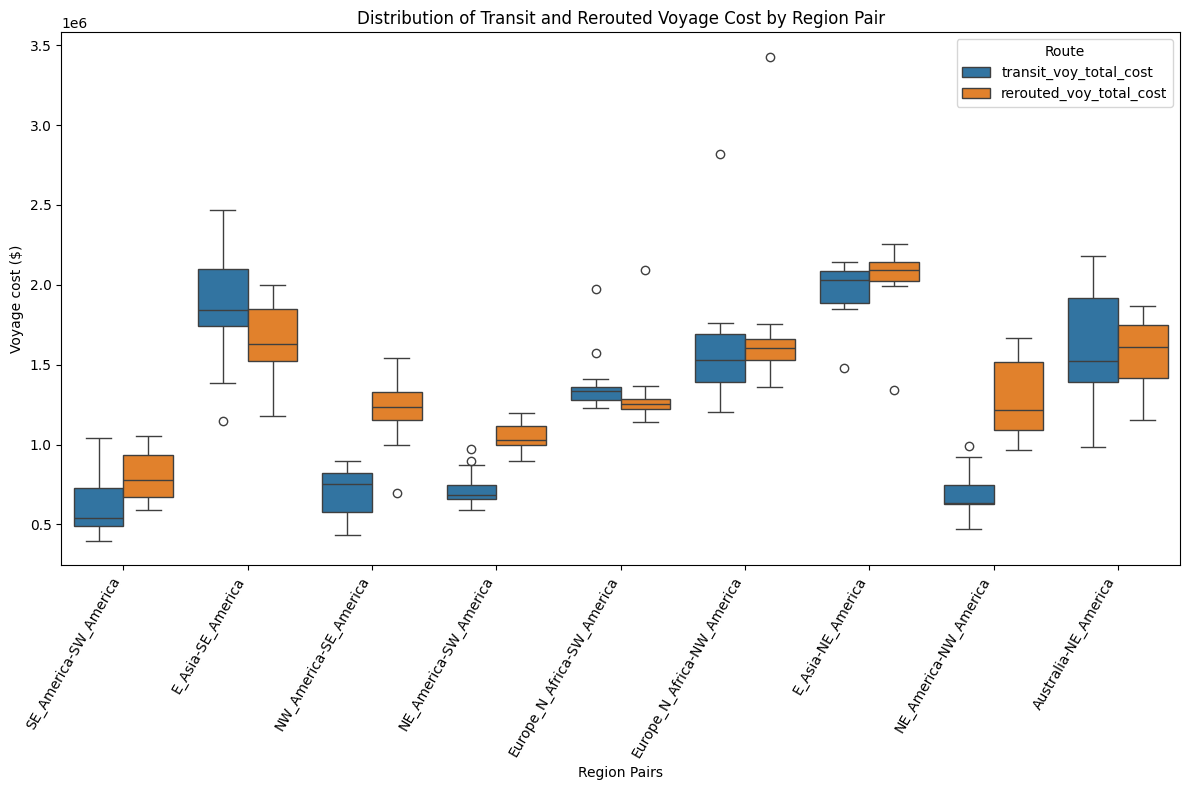

<ipython-input-36-a0531f81c229>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  box_plot_stats = df_melted.groupby(['region_pairs', 'Route'])['voyage_cost'].describe()


count      mean     std  \
region_pairs               Route                                              
SE_America-SW_America      rerouted_voy_total_cost     11   799,811 161,795   
                           transit_voy_total_cost      11   629,976 198,089   
E_Asia-SE_America          rerouted_voy_total_cost     11 1,651,277 235,571   
                           transit_voy_total_cost      11 1,863,224 382,506   
NW_America-SE_America      rerouted_voy_total_cost     15 1,223,139 200,030   
                           transit_voy_total_cost      15   712,850 152,177   
NE_America-SW_America      rerouted_voy_total_cost     15 1,047,650  90,316   
                           transit_voy_total_cost      15   726,115 108,488   
Europe_N_Africa-SW_America rerouted_voy_total_cost     12 1,318,206 250,498   
                           transit_voy_total_cost      12 1,385,301 206,125   
Europe_N_Africa-NW_America rerouted_voy_total_cost     15 1,702,309 491,477   
                           transit_voy_total_cost      15 1,601,740 374,155   
E_Asia-NE_America          rerouted_voy_total_cost     15 2,057,856 215,994   
                           transit_voy_total_cost      15 1,973,454 166,415   
NE_America-NW_America      rerouted_voy_total_cost     15 1,283,629 242,416   
                           transit_voy_total_cost      15   686,257 136,991   
Australia-NE_America       rerouted_voy_total_cost     11 1,580,688 222,807   
                           transit_voy_total_cost      11 1,618,235 372,321   

                                                         min       25%  \
region_pairs               Route                                         
SE_America-SW_America      rerouted_voy_total_cost   590,230   669,409   
                           transit_voy_total_cost    398,746   492,373   
E_Asia-SE_America          rerouted_voy_total_cost 1,177,612 1,522,420   
                           transit_voy_total_cost  1,146,370 1,743,740   
NW_America-SE_America      rerouted_voy_total_cost   696,279 1,155,519   
                           transit_voy_total_cost    431,793   575,688   
NE_America-SW_America      rerouted_voy_total_cost   894,869   999,213   
                           transit_voy_total_cost    593,219   660,538   
Europe_N_Africa-SW_America rerouted_voy_total_cost 1,138,727 1,220,687   
                           transit_voy_total_cost  1,231,110 1,281,081   
Europe_N_Africa-NW_America rerouted_voy_total_cost 1,360,588 1,527,153   
                           transit_voy_total_cost  1,201,322 1,394,842   
E_Asia-NE_America          rerouted_voy_total_cost 1,340,810 2,024,520   
                           transit_voy_total_cost  1,476,526 1,889,348   
NE_America-NW_America      rerouted_voy_total_cost   969,065 1,088,706   
                           transit_voy_total_cost    470,648   626,680   
Australia-NE_America       rerouted_voy_total_cost 1,151,581 1,418,173   
                           transit_voy_total_cost    983,666 1,391,929   

                                                         50%       75%  \
region_pairs               Route                                         
SE_America-SW_America      rerouted_voy_total_cost   778,218   933,374   
                           transit_voy_total_cost    537,570   727,349   
E_Asia-SE_America          rerouted_voy_total_cost 1,627,910 1,851,793   
                           transit_voy_total_cost  1,842,938 2,100,933   
NW_America-SE_America      rerouted_voy_total_cost 1,232,899 1,328,875   
                           transit_voy_total_cost    756,242   825,166   
NE_America-SW_America      rerouted_voy_total_cost 1,031,525 1,117,896   
                           transit_voy_total_cost    684,228   749,398   
Europe_N_Africa-SW_America rerouted_voy_total_cost 1,253,761 1,282,589   
                           transit_voy_total_cost  1,335,834 1,357,852   
Europe_N_Africa-NW_America rerouted_voy_total_cost 1,602,639 1,657,989   
                           t

In [36]:
# Distribution of total voyage cost (rerouted VS transit) per region pairs
df_melted = Bulk_rerouted.melt(
    id_vars=['region_pairs'],
    value_vars=['transit_voy_total_cost', 'rerouted_voy_total_cost'],
    var_name='Route',
    value_name='voyage_cost'
)

plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='voyage_cost', hue='Route', data=df_melted)
plt.title('Distribution of Transit and Rerouted Voyage Cost by Region Pair')
plt.xlabel('Region Pairs')
plt.ylabel('Voyage cost ($)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

# Statistics of the box plots for each region pairs and route
box_plot_stats = df_melted.groupby(['region_pairs', 'Route'])['voyage_cost'].describe()
display(box_plot_stats)

East Asia - NE America is the route with the highest voyage total cost cosely followed by East Asia - SE America.

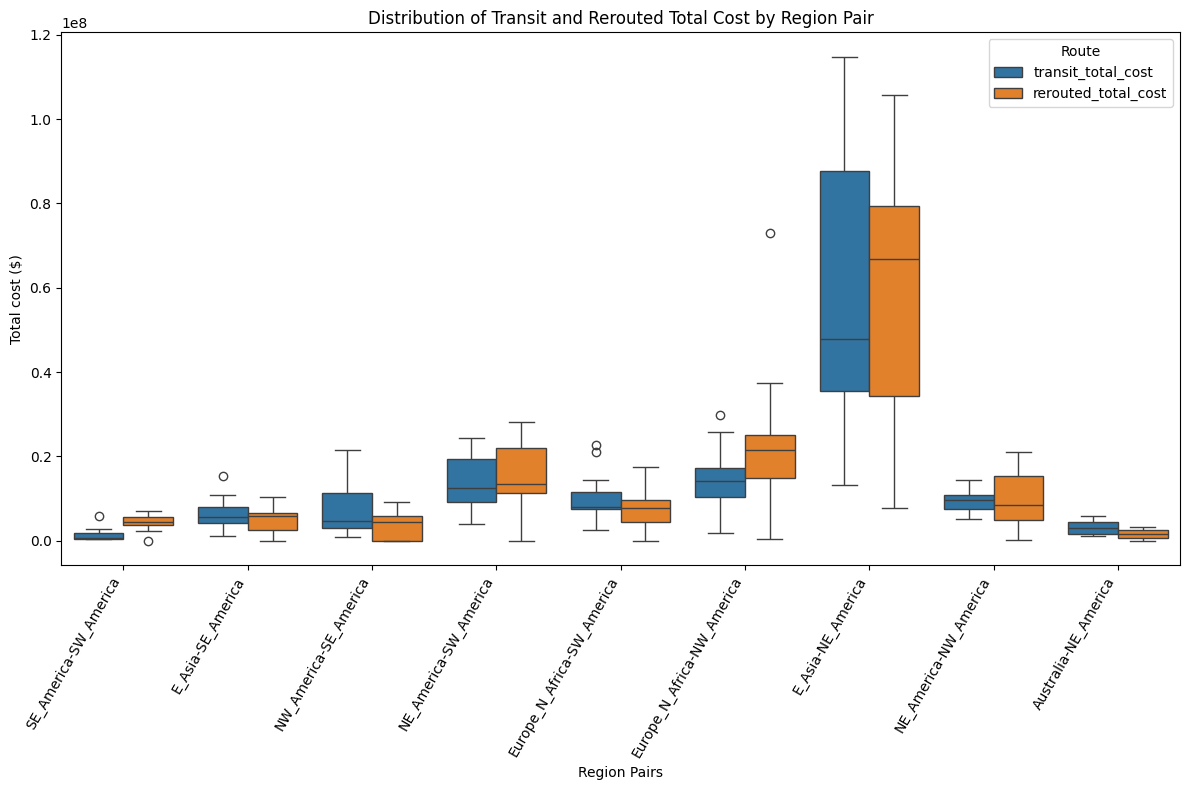

In [37]:
# Total voyage cost distribution per region pairs
df_melted = Bulk_rerouted.melt(
    id_vars=['region_pairs'],
    value_vars=['transit_total_cost', 'rerouted_total_cost'],
    var_name='Route',
    value_name='Total_cost'
)

plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='Total_cost', hue='Route', data=df_melted)
plt.title('Distribution of Transit and Rerouted Total Cost by Region Pair')
plt.xlabel('Region Pairs')
plt.ylabel('Total cost ($)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

Some box plot include 0 which illustrates that for some months, the region pairs did not have voyage. East Asia - NE America is largely bigger than the other region pairs has it contains more voyages and each voyage is expensive due to the distance.

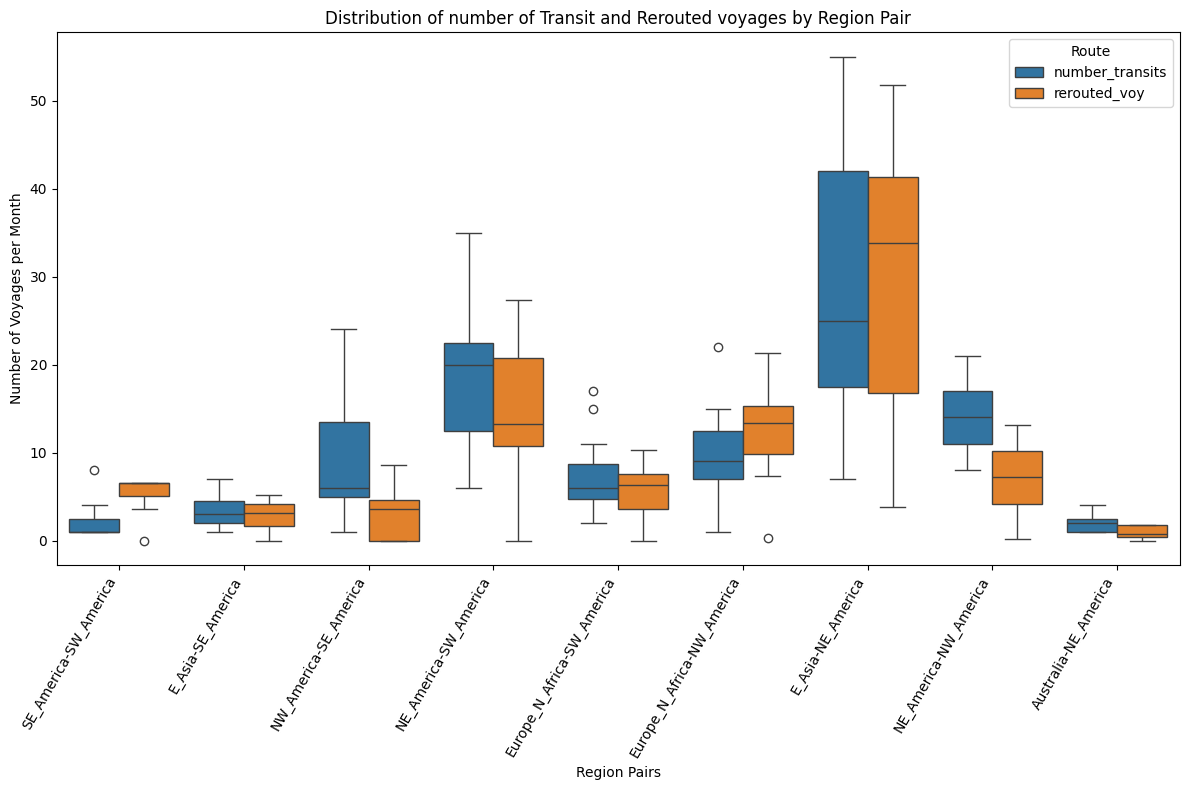

In [38]:
# Boxplot number transit and rerouted_yoy per region pairs
df_melted = Bulk_rerouted.melt(
    id_vars=['region_pairs'],
    value_vars=['number_transits', 'rerouted_voy'],
    var_name='Route',
    value_name='Number'
)

plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='Number', hue='Route', data=df_melted)
plt.title('Distribution of number of Transit and Rerouted voyages by Region Pair')
plt.xlabel('Region Pairs')
plt.ylabel('Number of Voyages per Month')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


In [39]:
# Comparison Total Cost with El Nino VS normal conditions

# Add Total Cost to Bulk_rerouted
Bulk_rerouted['Total_cost_normal_conditions'] = Bulk_rerouted['transit_voy_total_cost'] * (Bulk_rerouted['rerouted_voy']+Bulk_rerouted['number_transits'])
Bulk_rerouted['Total_cost_normal_conditions_shrotest_time'] =  (Bulk_rerouted['canal_fee']+Bulk_rerouted['daily_total_cost']*Bulk_rerouted['shortest_distance_day']) * (Bulk_rerouted['rerouted_voy']+Bulk_rerouted['number_transits'])
Bulk_rerouted['Total_cost_El_Nino'] = Bulk_rerouted['transit_total_cost'] + Bulk_rerouted['rerouted_total_cost']


In [40]:
Bulk_rerouted.head()

,proxy_transit_month,region_pairs,voy_intake_sum,number_transits,ONI,ONI_lag_1,ONI_lag_2,ONI_lag_3,water_level_m,water_level_m_lag_1,water_level_m_lag_2,water_level_m_lag_3,IFO380,Coal_Australian,Soybeans,Maize_Corn,Wheat_HRW,Phosphate_rock,Copper,Soybean_meal,Sugar,Urea,Potassium_chloride,Zinc,Wood_Pellets,Coking_Coal,HRC_Steel,Steel,Petroleum_Coke,Salt,voy_sea_duration_h,distance_94,shortest_distance_nm,shortest_distance_day,second_shortest_distance_nm,second_shortest_distance_day,rerouting_nm,rerouting_day,vsl_dwt,fuel_consumption_mt,cargo_value,canal_fee,Australia-NE_America,E_Asia-NE_America,E_Asia-SE_America,Europe_N_Africa-NW_America,Europe_N_Africa-SW_America,NE_America-NW_America,NE_America-SW_America,NW_America-SE_America,SE_America-SW_America,dry_season,rain_season_1st_half,rain_season_2nd_half,residuals,forecast,forecastElNino,rerouted_voy,forecast_rerouted_voy,voy_sea_duration_day,capital_cost,operating_cost,fuel_cost,daily_fuel_consumption,inventory_cost,emissions_cost,emissions,daily_total_cost,rerouted_voy_total_cost,rerouted_total_cost,transit_voy_total_cost,transit_total_cost,rerouted_voy_emissions,transit_voy_emissions,emissions_normal_conditions,cost_increase_voy_sea_duration,cost_increase_shortest_distance_day,index,transit_time_day,Total_cost_normal_conditions,Total_cost_normal_conditions_shrotest_time,Total_cost_El_Nino
467,2023-06-01,SE_America-SW_America,284786,8,0.77,0.48,0.16,-0.15,24,25,25,26,489,139,592,267,346,344,"8,397",492,909,288,328,"2,375",419,226,"1,135",523,130,25,452,"2,850","2,021",6.47,"8,764",28,"6,743",22,"37,832",265,"9,720,624","178,156",0,0,0,0,0,0,0,0,1,0,1,0,-1.56,7.60,9.56,0.00,-1.96,19,"5,438","5,319","6,882",14,"6,658","4,380",44,"28,677","805,526",0.00,"717,904","5,743,233",0.00,"6,595","6,595","265,779","619,845",467,12,"5,743,233","2,910,699","5,743,233"
468,2023-06-01,E_Asia-SE_America,37144,2,0.77,0.48,0.16,-0.15,24,25,25,26,489,139,592,267,346,344,"8,397",492,909,288,328,"2,375",419,226,"1,135",523,130,25,"1,383","11,778","8,463",27,"14,312",46,"5,849",19,"20,669",858,"18,603,517","117,136",0,0,1,0,0,0,0,0,0,0,1,0,-7.59,6.18,9.59,4.18,-3.41,58,"3,588","4,677","7,288",15,"12,742","4,638",46,"32,933","1,510,650","6,317,263","2,014,780","4,029,559","8,896","5,345","16,520",0.00,"617,170",468,30,"12,455,001","6,247,446","10,346,822"
469,2023-06-01,NW_America-SE_America,836387,17,0.77,0.48,0.16,-0.15,24,25,25,26,489,139,592,267,346,344,"8,397",492,909,288,328,"2,375",419,226,"1,135",523,130,25,389,"1,861","3,662",12,"12,510",40,"8,849",28,"63,301",151,"9,519,040","207,446",0,0,0,0,0,0,0,1,0,0,1,0,-0.51,9.64,18,0.00,-7.88,16,"8,016","5,998","4,565",9.33,"6,520","2,905",29,"28,005","1,122,868",0.00,"661,042","11,237,715",0.00,"8,000","8,000","669,272","794,227",469,4.46,"11,237,715","9,113,479","11,237,715"
470,2023-06-01,NE_America-SW_America,777123,22,0.77,0.48,0.16,-0.15,24,25,25,26,489,139,592,267,346,344,"8,397",492,909,288,328,"2,375",419,226,"1,135",523,130,25,453,"3,455","2,940",9.43,"10,268",33,"7,328",23,"37,963",180,"17,135,602","178,307",0,0,0,0,0,0,1,0,0,0,1,0,-2.01,33,24,11,9.28,19,"5,451","5,323","4,663",9.53,"11,737","2,968",30,"30,142","991,970","11,198,242","747,651","16,448,318","11,025","12,332","18,660","422,627","707,883",470,9.46,"24,888,465","15,392,614","27,646,560"
471,2023-06-01,Europe_N_Africa-SW_America,218320,8,0.77,0.48,0.16,-0.15,24,25,25,26,489,139,592,267,346,344,"8,397",492,909,288,328,"2,375",419,226,"1,135",523,130,25,827,"5,486","8,023",26,"11,007",35,"2,984",9.57,"35,870",469,"18,603,517","157,649",0,0,0,0,1,0,0,0,0,0,1,0,-5.20,12,13,4.32,-0.88,34,"5,231","5,256","6,661",14,"12,742","4,239",42,"34,129","1,204,088","5,199,470","1,333,727","10,669,813","6,458","11,686","17,994","28,010","326,619",471,8.75,"16,429,087","12,750,772","15,869,283"


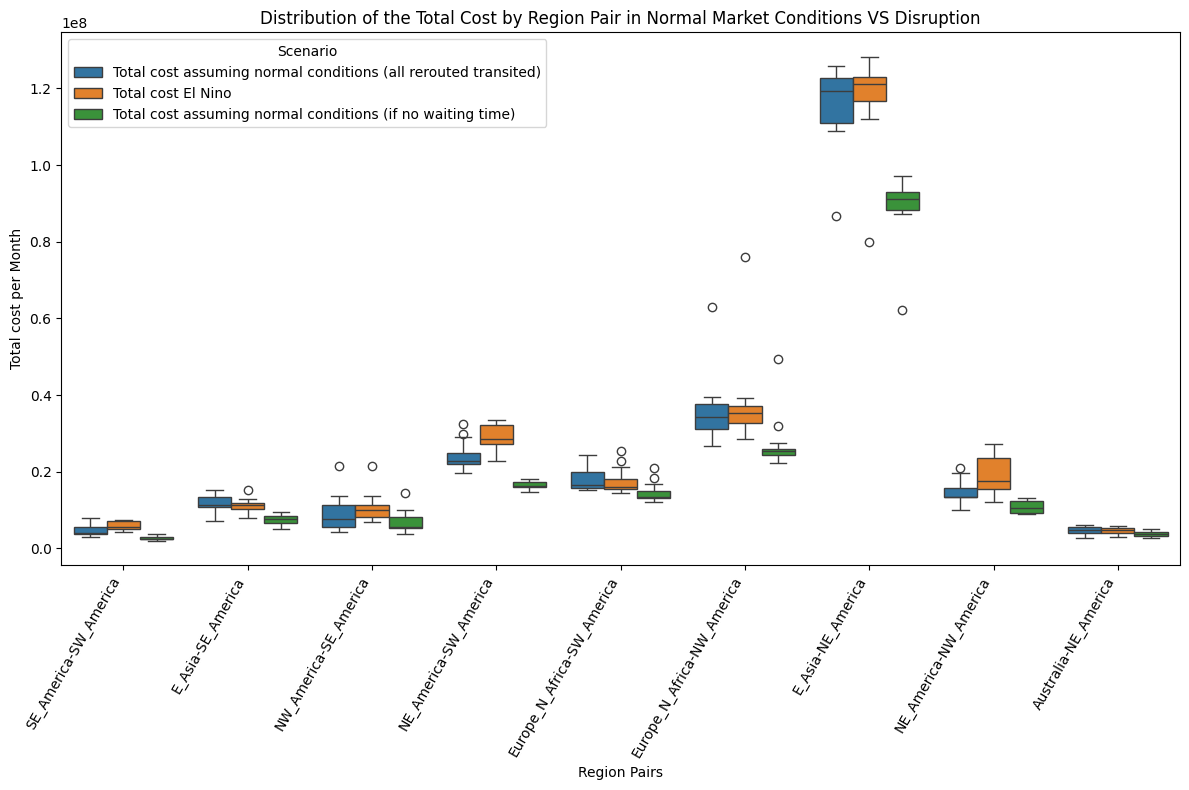

In [41]:
# Boxplot of Total_cost_normal_conditions VS Total_cost_El_Nino
df_melted = Bulk_rerouted.melt(
    id_vars=['region_pairs'],
    value_vars=['Total_cost_normal_conditions', 'Total_cost_El_Nino', 'Total_cost_normal_conditions_shrotest_time'],
    var_name='Scenario',
    value_name='Total_cost'
)

# Map the old value names to the new desired names for the plot legend
scenario_names = {
    'Total_cost_normal_conditions': 'Total cost assuming normal conditions (all rerouted transited)',
    'Total_cost_El_Nino': 'Total cost El Nino',
    'Total_cost_normal_conditions_shrotest_time': 'Total cost assuming normal conditions (if no waiting time)'
}

# Apply the mapping to the 'Scenario' column
df_melted['Scenario'] = df_melted['Scenario'].map(scenario_names)

plt.figure(figsize=(12, 8))
sns.boxplot(x='region_pairs', y='Total_cost', hue='Scenario', data=df_melted)

plt.title('Distribution of the Total Cost by Region Pair in Normal Market Conditions VS Disruption')
plt.xlabel('Region Pairs')
plt.ylabel('Total cost per Month')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [42]:
# Calculate the sum of costs for each region pair
cost_summary = Bulk_rerouted.groupby('region_pairs')[['Total_cost_normal_conditions', 'Total_cost_El_Nino']].sum()

# Calculate the difference in costs
cost_summary['Cost_Difference'] = cost_summary['Total_cost_El_Nino'] - cost_summary['Total_cost_normal_conditions']

# Calculate the total sum for each column
total_row = cost_summary.sum()

# Add the total sum row to the DataFrame
cost_summary.loc['Total'] = total_row

# Set pandas display option to show full numbers
pd.options.display.float_format = '{:,.0f}'.format

# Cost_difference (%)
cost_summary['Cost_Difference_Percentage'] = (cost_summary['Cost_Difference'] / cost_summary['Total_cost_normal_conditions']) * 100

# Display the results in a table
display(cost_summary)

<ipython-input-42-a1992978b7d5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_summary = Bulk_rerouted.groupby('region_pairs')[['Total_cost_normal_conditions', 'Total_cost_El_Nino']].sum()


,Total_cost_normal_conditions,Total_cost_El_Nino,Cost_Difference,Cost_Difference_Percentage
region_pairs,,,,
SE_America-SW_America,"52,953,159","64,607,454","11,654,296",22
E_Asia-SE_America,"128,488,650","123,332,536","-5,156,114",-4
NW_America-SE_America,"133,924,232","156,185,453","22,261,221",17
NE_America-SW_America,"363,685,368","436,799,000","73,113,632",20
Europe_N_Africa-SW_America,"214,829,084","211,208,221","-3,620,864",-2
Europe_N_Africa-NW_America,"536,219,019","558,482,944","22,263,925",4
E_Asia-NE_America,"1,740,452,017","1,769,802,889","29,350,872",2
NE_America-NW_America,"218,042,683","288,775,559","70,732,876",32
Australia-NE_America,"51,957,717","51,289,017","-668,700",-1


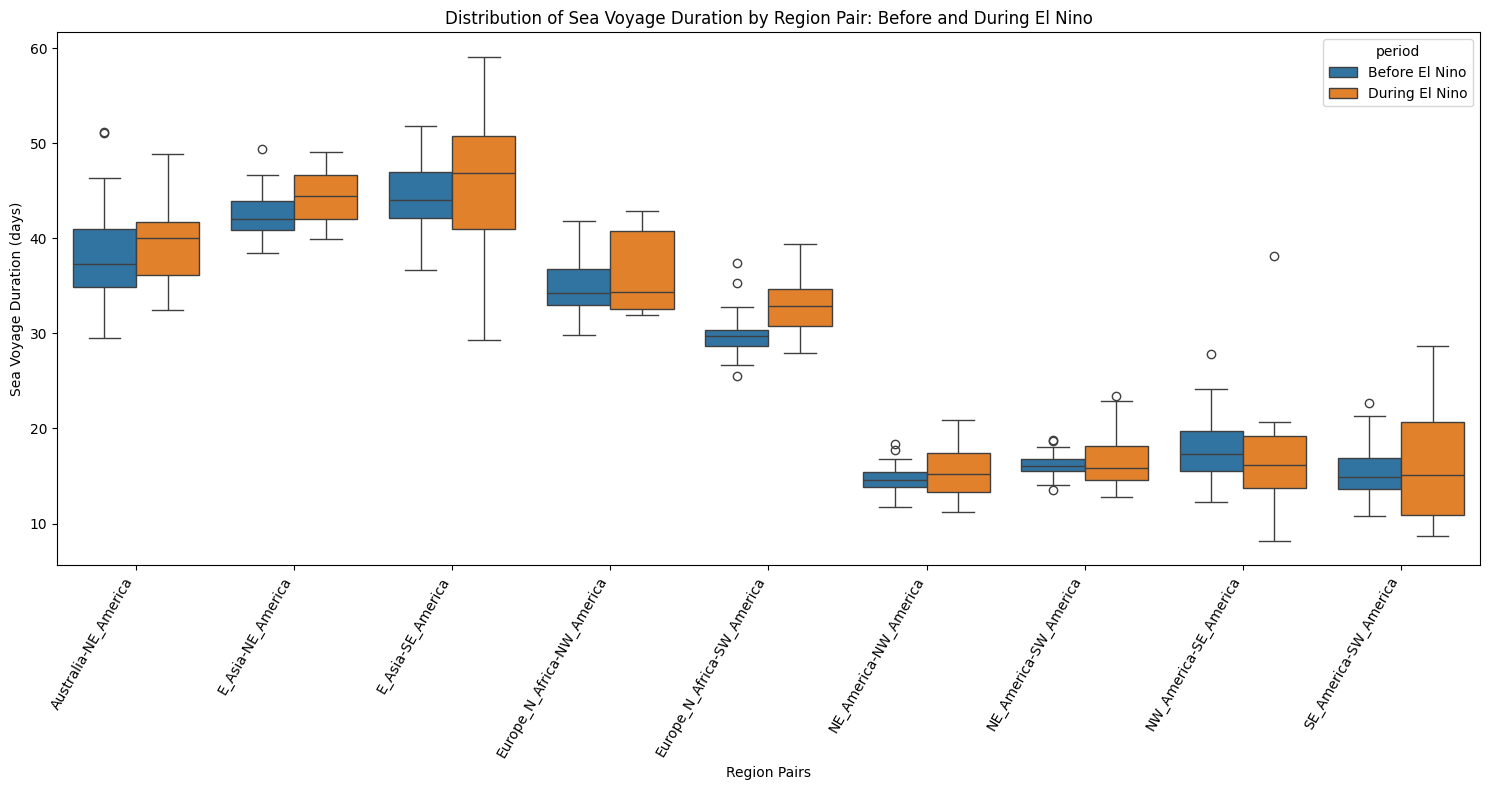

In [43]:
# Distribution of Sea Voyage Duration by Region Pair: Before and During El Nino

# Combine the two dataframes for easier plotting
combined_df = pd.concat([
    Bulk_PA_Before_ElNino.assign(period='Before El Nino'),
    Bulk_rerouted.assign(period='During El Nino')
])

# Create the box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='region_pairs', y='voy_sea_duration_day', hue='period', data=combined_df)
plt.title('Distribution of Sea Voyage Duration by Region Pair: Before and During El Nino')
plt.xlabel('Region Pairs')
plt.ylabel('Sea Voyage Duration (days)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

As illustrated by the graph, the voyage duration is much more volatile in El Nino period.

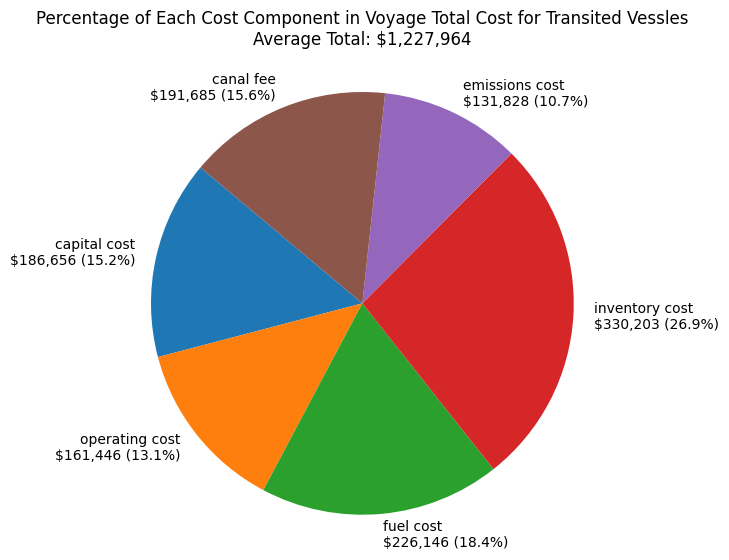

In [44]:
# Pie chart for cost compenets for transited vessels
# Create a copy of the Bulk_rerouted DataFrame
Bulk_rerouted_copy = Bulk_rerouted.copy()

# Calculate the voyage cost for each component (excluding canal_fee) in the copied DataFrame
Bulk_rerouted_copy['voy_capital_cost'] = Bulk_rerouted_copy['capital_cost'] * (Bulk_rerouted_copy['voy_sea_duration_day'])
Bulk_rerouted_copy['voy_operating_cost'] = Bulk_rerouted_copy['operating_cost'] * (Bulk_rerouted_copy['voy_sea_duration_day'])
Bulk_rerouted_copy['voy_fuel_cost'] = Bulk_rerouted_copy['fuel_cost'] * (Bulk_rerouted_copy['voy_sea_duration_day'])
Bulk_rerouted_copy['voy_inventory_cost'] = Bulk_rerouted_copy['inventory_cost'] * (Bulk_rerouted_copy['voy_sea_duration_day'])
Bulk_rerouted_copy['voy_emissions_cost'] = Bulk_rerouted_copy['emissions_cost'] * (Bulk_rerouted_copy['voy_sea_duration_day'])
Bulk_rerouted_copy['voy_canal_fee'] = Bulk_rerouted_copy['canal_fee']

# Calculate the average of each voyage cost component from the copied DataFrame
average_voyage_costs = Bulk_rerouted_copy[['voy_capital_cost', 'voy_operating_cost', 'voy_fuel_cost', 'voy_inventory_cost', 'voy_emissions_cost', 'voy_canal_fee']].mean()

# Calculate the total average transit voyage cost
total_average_transit_voy_cost = average_voyage_costs.sum()

# Calculate the percentage of each cost component
voyage_cost_percentages = (average_voyage_costs / total_average_transit_voy_cost) * 100

# Create custom labels with percentage and actual value, removing 'voy_' prefix and underscores
labels = [f'{label.replace("voy_", "").replace("_", " ")}\n${value:,.0f} ({percentage:.1f}%)' for label, value, percentage in zip(average_voyage_costs.index, average_voyage_costs, voyage_cost_percentages)]

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(voyage_cost_percentages, labels=labels, autopct='', startangle=140)
plt.title(f'Percentage of Each Cost Component in Voyage Total Cost for Transited Vessles\nAverage Total: ${total_average_transit_voy_cost:,.0f}', pad=20)
plt.axis('equal')
plt.show()

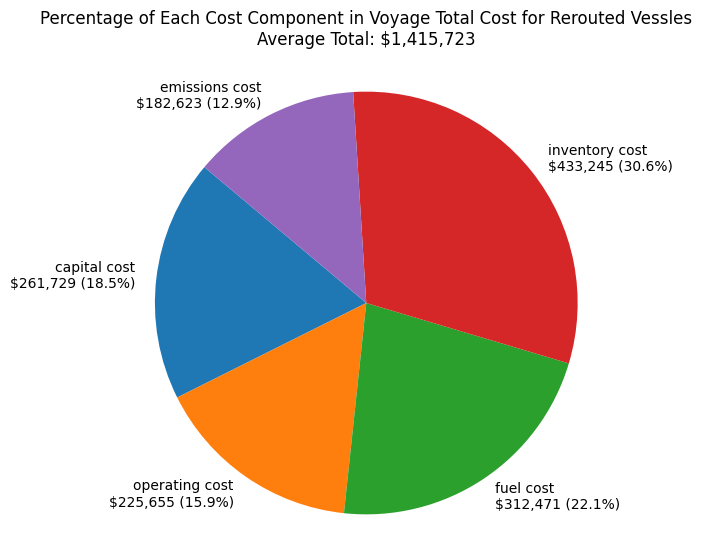

In [45]:
# Pie chart for cost compenets for rerouted vessels
# Calculate the voyage cost for each component for rerouted voyages
Bulk_rerouted_copy['rerouted_voy_capital_cost'] = Bulk_rerouted_copy['capital_cost'] * Bulk_rerouted_copy['second_shortest_distance_day']
Bulk_rerouted_copy['rerouted_voy_operating_cost'] = Bulk_rerouted_copy['operating_cost'] * Bulk_rerouted_copy['second_shortest_distance_day']
Bulk_rerouted_copy['rerouted_voy_fuel_cost'] = Bulk_rerouted_copy['fuel_cost'] * Bulk_rerouted_copy['second_shortest_distance_day']
Bulk_rerouted_copy['rerouted_voy_inventory_cost'] = Bulk_rerouted_copy['inventory_cost'] * Bulk_rerouted_copy['second_shortest_distance_day']
Bulk_rerouted_copy['rerouted_voy_emissions_cost'] = Bulk_rerouted_copy['emissions_cost'] * Bulk_rerouted_copy['second_shortest_distance_day']

# Calculate the average of each voyage cost component for rerouted voyages
average_rerouted_voyage_costs = Bulk_rerouted_copy[['rerouted_voy_capital_cost', 'rerouted_voy_operating_cost', 'rerouted_voy_fuel_cost', 'rerouted_voy_inventory_cost', 'rerouted_voy_emissions_cost']].mean()

# Calculate the total average rerouted voyage cost
total_average_rerouted_voy_cost = average_rerouted_voyage_costs.sum()

# Calculate the percentage of each cost component
rerouted_voyage_cost_percentages = (average_rerouted_voyage_costs / total_average_rerouted_voy_cost) * 100

# Create custom labels with percentage and actual value, removing 'rerouted_voy_' prefix and underscores
labels = [f'{label.replace("rerouted_voy_", "").replace("_", " ")}\n${value:,.0f} ({percentage:.1f}%)' for label, value, percentage in zip(average_rerouted_voyage_costs.index, average_rerouted_voyage_costs, rerouted_voyage_cost_percentages)]

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(rerouted_voyage_cost_percentages, labels=labels, autopct='', startangle=140)
plt.title(f'Percentage of Each Cost Component in Voyage Total Cost for Rerouted Vessles\nAverage Total: ${total_average_rerouted_voy_cost:,.0f}', pad=20)
plt.axis('equal')
plt.show()